In [134]:
#Imported necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text

In [135]:
#DATA PREPARATTION. 
#The data was downloaded from the following link: https://www.basketball-reference.com/leagues/NBA_2024_shooting.html
df = pd.read_csv('shooting.csv')
#Previewed the data
print('Origial Data:')
print(df.head())

Origial Data:
   Rk            Player  Age Team Pos   G  GS   MP▼   FG Dist.  ...   TRB  \
0   1     DeMar DeRozan   34  CHI  SF  79  79  2989  650  13.2  ...   340   
1   2  Domantas Sabonis   27  SAC   C  82  82  2928  634   6.2  ...  1120   
2   3        Coby White   23  CHI  PG  79  78  2881  541  15.5  ...   358   
3   4     Mikal Bridges   27  BRK  SF  82  82  2854  564  15.9  ...   372   
4   5    Paolo Banchero   21  ORL  PF  80  80  2799  640  12.6  ...   554   

   AST  STL  BLK  TOV   PF   PTS  Trp-Dbl            Awards  Player-additional  
0  421   90   45  135  161  1897      0.0            CPOY-2          derozde01  
1  673   74   48  272  250  1593     26.0  MVP-8DPOY-10NBA3          sabondo01  
2  405   53   18  166  186  1509      0.0               NaN          whiteco01  
3  299   81   30  164  116  1606      0.0               NaN          bridgmi01  
4  431   71   47  247  153  1804      2.0                AS          banchpa01  

[5 rows x 52 columns]


In [136]:
#Drop the first two rows, the first column and the last 2 columns.
cleaned_df = df.iloc[:, 1:-3]
new_column_names = ['Player','Age','Team','Position','GP','GS','MP','FG','AFD','2_Point_Attempt%','Restricted_Area_Attempt%','Short_Midrange_Attempt%','Mid_Post_Attempt%','Long_Midrange_Attempt%','3_Point_Attempt%',
                    'Restricted_Area%','Short_Midrange%','Mid_Post%','Long_Midrange%','2P_Assisted%','3P_Assisted%','Dunks%','Dunks','Corner_3PA%','Corner_3P%','Heaves_Attempted','Heaves_Made','FGA','FG%','3P','3PA','3P%',
                    '2P','2PA','2P%','eFG%', 'FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF', 'PTS']
print(len(cleaned_df.columns))
print(len(new_column_names))
# Assign the new column names to the cleaned dataframe
cleaned_df.columns = new_column_names
#Previewed the cleaned data
print('\nCleaned Data:')
print(cleaned_df.head())



48
48

Cleaned Data:
             Player  Age Team Position  GP  GS    MP   FG   AFD  \
0     DeMar DeRozan   34  CHI       SF  79  79  2989  650  13.2   
1  Domantas Sabonis   27  SAC        C  82  82  2928  634   6.2   
2        Coby White   23  CHI       PG  79  78  2881  541  15.5   
3     Mikal Bridges   27  BRK       SF  82  82  2854  564  15.9   
4    Paolo Banchero   21  ORL       PF  80  80  2799  640  12.6   

   2_Point_Attempt%  ...    FT%  ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0             0.834  ...  0.853   43  297   340  421   90   45  135  161  1897  
1             0.919  ...  0.704  294  826  1120  673   74   48  272  250  1593  
2             0.540  ...  0.838   44  314   358  405   53   18  166  186  1509  
3             0.543  ...  0.814   68  304   372  299   81   30  164  116  1606  
4             0.751  ...  0.725   82  472   554  431   71   47  247  153  1804  

[5 rows x 48 columns]


In [137]:
#Lets explore the data with the renamed columns.
print('Data Types:\n',cleaned_df.dtypes)
print('Column Names:\n', cleaned_df.columns)
print('Null columns:\n', cleaned_df.isnull().sum())


Data Types:
 Player                       object
Age                           int64
Team                         object
Position                     object
GP                            int64
GS                            int64
MP                            int64
FG                            int64
AFD                          object
2_Point_Attempt%            float64
Restricted_Area_Attempt%    float64
Short_Midrange_Attempt%     float64
Mid_Post_Attempt%           float64
Long_Midrange_Attempt%      float64
3_Point_Attempt%            float64
Restricted_Area%            float64
Short_Midrange%             float64
Mid_Post%                   float64
Long_Midrange%              float64
2P_Assisted%                float64
3P_Assisted%                float64
Dunks%                      float64
Dunks                         int64
Corner_3PA%                 float64
Corner_3P%                  float64
Heaves_Attempted              int64
Heaves_Made                   int64
FGA            

In [138]:
#Columns to convert to integer.
integer_columns = ['Age','GP', 'GS', 'MP', 'FG','FGA','3P','3PA', 'FT', 'FTA', 'DRB','ORB','AST', 'STL', 'BLK', 'TOV', 'PF','Dunks','PTS','Heaves_Attempted','Heaves_Made']
#Columns to convert to float.
float_columns = ['AFD','2_Point_Attempt%','Restricted_Area_Attempt%','Short_Midrange_Attempt%','Mid_Post_Attempt%','Long_Midrange_Attempt%','3_Point_Attempt%',
            'Restricted_Area%','Short_Midrange%','Mid_Post%','Long_Midrange%','2P_Assisted%','3P_Assisted%','Dunks%','Corner_3PA%','Corner_3P%','FT%', 'FG%', '3P%', '2P%', 'eFG%'] # Note: 'eFG%' is a float column, so it should be included in the conversion.
# Convert integer columns to int
for col in integer_columns:
    try:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce').astype('Int64')
    except Exception as e:
        print(f"Error converting '{col} to Int64: {e}")
# Convert float columns to float
for col in float_columns:
    try:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce').astype('float64')
    except Exception as e:
        print(f"Error converting '{col}' to float64: {e}")

# Check the data types again to confirm conversion
print('\nData Types After Conversion:')
print(cleaned_df.dtypes)



Data Types After Conversion:
Player                       object
Age                           Int64
Team                         object
Position                     object
GP                            Int64
GS                            Int64
MP                            Int64
FG                            Int64
AFD                         float64
2_Point_Attempt%            float64
Restricted_Area_Attempt%    float64
Short_Midrange_Attempt%     float64
Mid_Post_Attempt%           float64
Long_Midrange_Attempt%      float64
3_Point_Attempt%            float64
Restricted_Area%            float64
Short_Midrange%             float64
Mid_Post%                   float64
Long_Midrange%              float64
2P_Assisted%                float64
3P_Assisted%                float64
Dunks%                      float64
Dunks                         Int64
Corner_3PA%                 float64
Corner_3P%                  float64
Heaves_Attempted              Int64
Heaves_Made                   Int6

In [139]:
#We are going to add new columns that were not in the original dataset but can be calculated from the existing columns.
#Points Per Shot
cleaned_df['Point_Per_Shot'] = (cleaned_df['2P'] * 2 + cleaned_df['3P']  *3) / cleaned_df['FGA']
cleaned_df['Point_Per_Shot'] = round(cleaned_df['Point_Per_Shot'], 2)  
#Points Per Game
cleaned_df['PPG'] = cleaned_df['PTS'] / cleaned_df['GP']
cleaned_df['PPG'] = round(cleaned_df['PPG'], 2) 
#True Shooting Percentage (TS%)
cleaned_df['TS%'] = (cleaned_df['PTS']  / (2 * (cleaned_df['FGA'] + 0.44 * cleaned_df['FTA']))) * 100
cleaned_df['TS%'] = round(cleaned_df['TS%'], 2)
#Field Goal Attempts Per Game
cleaned_df['FGA_Per_Game'] = cleaned_df['FGA'] / cleaned_df['GP']
cleaned_df['FGA_Per_Game'] = round(cleaned_df['FGA_Per_Game'], 2) 
#3PA Per Game
cleaned_df['3PA_Per_Game'] = cleaned_df['3PA'] / cleaned_df['GP']
cleaned_df['3PA_Per_Game'] = round(cleaned_df['3PA_Per_Game'], 2)
#Field Goal Per Game
cleaned_df['FG_Per_Game'] = cleaned_df['FG'] / cleaned_df['GP']
cleaned_df['FG_Per_Game'] = round(cleaned_df['FG_Per_Game'], 2)
#3P Per Game
cleaned_df['3P_Per_Game'] = cleaned_df['3P'] / cleaned_df['GP']
cleaned_df['3P_Per_Game'] = round(cleaned_df['3P_Per_Game'], 2)
#FTA Per Game
cleaned_df['FTA_Per_Game'] = cleaned_df['FTA'] / cleaned_df['GP']
cleaned_df['FTA_Per_Game'] = round(cleaned_df['FTA_Per_Game'], 2)
#FT Per Game
cleaned_df['FT_Per_Game'] = cleaned_df['FT'] / cleaned_df['GP']
cleaned_df['FT_Per_Game'] = round(cleaned_df['FT_Per_Game'], 2)
#2P_Unassisted%
cleaned_df['2P_Unassisted%'] = 1 - cleaned_df['2P_Assisted%']
cleaned_df['2P_Unassisted%'] = round(cleaned_df['2P_Unassisted%'], 2) # Round to 2 decimal places for clarity
#3P_Unassisted%
cleaned_df['3P_Unassisted%'] = 1 - cleaned_df['3P_Assisted%']
cleaned_df['3P_Unassisted%'] = round(cleaned_df['3P_Unassisted%'], 2) # Round to 2 decimal places for clarity
#Unassisted_2P_total 
cleaned_df['Unassisted_2PM'] = cleaned_df['2P'] - (cleaned_df['2P_Unassisted%'] * 100)
cleaned_df['Unassisted_2PM'] = round(cleaned_df['Unassisted_2PM']) # Round to 2 decimal places for clarity
#Unassisted_3P_total
cleaned_df['Unassisted_3PM'] = cleaned_df['3P'] - (cleaned_df['3P_Unassisted%'] * 100)
cleaned_df['Unassisted_3PM'] = round(cleaned_df['Unassisted_3PM']) # Round to 2 decimal places for clarity


In [140]:
#Lets check the final cleaned dataframe for any remaining issues
print("\nFinal cleaned dataframe info:")
print(cleaned_df.info())
print("\nFinal cleaned dataframe shape:")
print(cleaned_df.shape)
print("\nFinal cleaned dataframe missing values:")
print(cleaned_df.isnull().sum())
print("\nFinal cleaned dataframe duplicates:")
print(cleaned_df.duplicated().sum())
# Save the final cleaned dataframe to a CSV file for further analysis
cleaned_df.to_csv('final_cleaned_shooting_data.csv', index=False)



Final cleaned dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    572 non-null    object 
 1   Age                       572 non-null    Int64  
 2   Team                      572 non-null    object 
 3   Position                  572 non-null    object 
 4   GP                        572 non-null    Int64  
 5   GS                        572 non-null    Int64  
 6   MP                        572 non-null    Int64  
 7   FG                        572 non-null    Int64  
 8   AFD                       568 non-null    float64
 9   2_Point_Attempt%          568 non-null    float64
 10  Restricted_Area_Attempt%  568 non-null    float64
 11  Short_Midrange_Attempt%   568 non-null    float64
 12  Mid_Post_Attempt%         568 non-null    float64
 13  Long_Midrange_Attempt%    568 non-

                     Player   FG
25    Giannis Antetokounmpo  837
8              Nikola Jokić  822
18              Luka Dončić  804
27  Shai Gilgeous-Alexander  796
9             Jalen Brunson  790
5              Kevin Durant  751
13             De'Aaron Fox  720
7           Anthony Edwards  718
11            Anthony Davis  713
29             LeBron James  685
14            Pascal Siakam  681
6           Dejounte Murray  672
15             Jayson Tatum  672
37            Stephen Curry  650
0             DeMar DeRozan  650
34             Devin Booker  642
4            Paolo Banchero  640
17             Tyrese Maxey  638
1          Domantas Sabonis  634
49             Jaylen Brown  627
68          Zion Williamson  624
52            Kawhi Leonard  610
56               Kyle Kuzma  608
19           Nikola Vučević  586
30              Paul George  582
3             Mikal Bridges  564
20              Jalen Green  563
23            Miles Bridges  559
81        Victor Wembanyama  551
24        

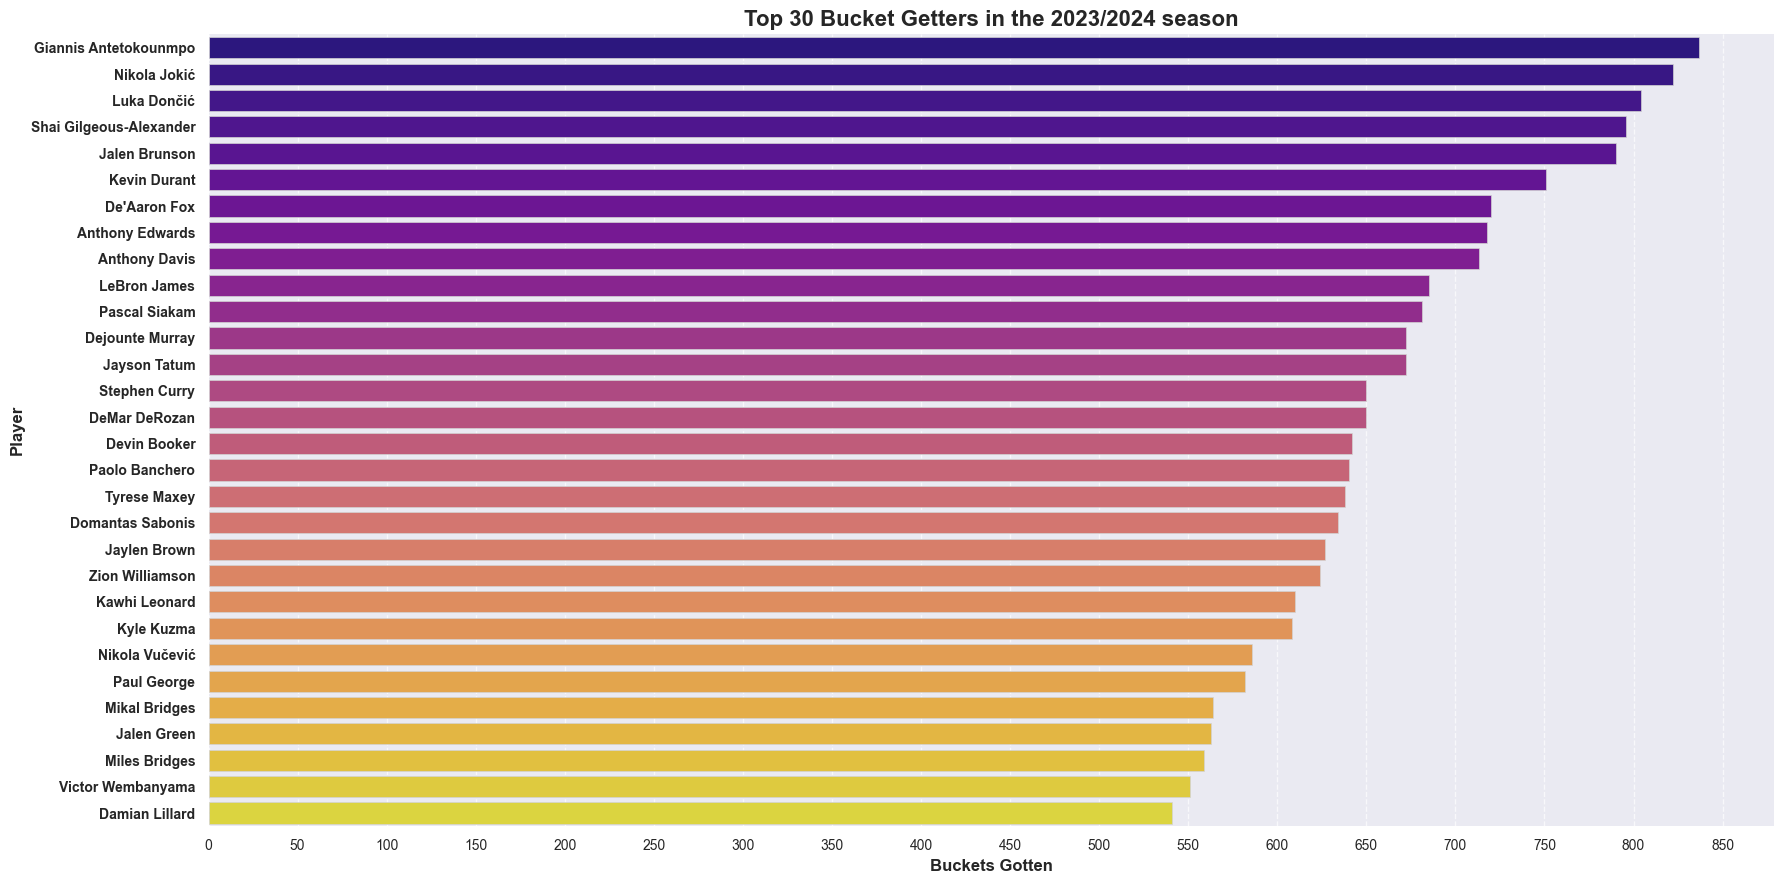

In [141]:
# Plot Field Goals by Player
plt.figure(figsize=(18,9)) #increase figure size.

df_sorted = cleaned_df[(cleaned_df['GP'] > 65)].sort_values('FG', ascending=False).head(30)
print(df_sorted[['Player', 'FG']]) # Print the sorted dataframe for debugging purposes.

palette = sns.color_palette("plasma", n_colors= len(df_sorted['Player'].unique())) #create color palette.
sns.barplot(x='FG', y='Player', data=df_sorted, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 Bucket Getters in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Buckets Gotten', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

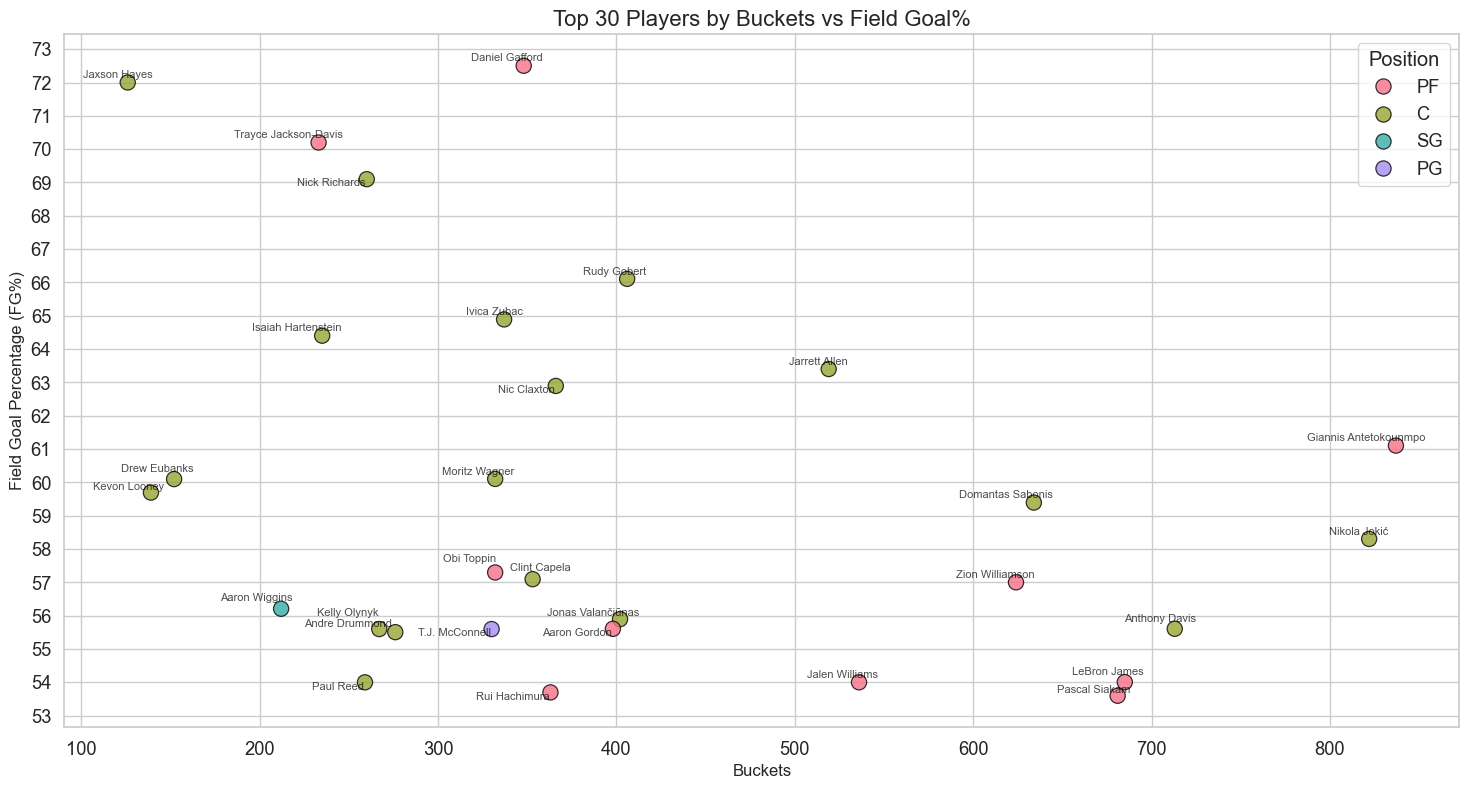

In [142]:

#Scatter Plot 1: FG vs FG%
top_30_fg = cleaned_df[(cleaned_df['GP'] > 65)].sort_values(by=['FG%','FG'], ascending=[False,False]).head(30) # Get the top 30 players by FG% with a minimum of 328 field goal attemptsand 65 games played to ensure we are looking at players with a significant number of attempts.

#Define colors based on unique positions.
position_palette = {
    pos:color for pos, color in zip(top_30_fg['Position'].unique(), sns.color_palette('husl', n_colors=top_30_fg['Position'].nunique()))
}
#Add jitter to prevent overlapping points
jitter_x = np.random.normal(0, 0.005, len(top_30_fg['FG'])) # Add jitter to the x-axis
jitter_y = np.random.normal(0, 0.005, len(top_30_fg['FG%'])) # Add jitter to the y-axis

#Turn the percenatge to decimal for the plot.
top_30_fg['FG%'] = top_30_fg['FG%']  * 100  # Convert FG% to decimal for plotting
plt.figure(figsize=(18,9))

#Set Seaborn style
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

#Convery pandas datatype to float for plotting
top_30_fg = top_30_fg.astype({col: 'float64' for col in top_30_fg.select_dtypes(include='Float64').columns}) # Ensure all float columns are in float64 for plotting


#Scatter plot with color based on position
sns.scatterplot(
    x=top_30_fg['FG'] + jitter_x, 
    y=top_30_fg['FG%'] + jitter_y,
    hue=top_30_fg['Position'],
    palette = position_palette, 
    edgecolor='black',
    s = 120,
    alpha=0.8,
    legend='brief'
)

#Set x and y axis major ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

#Annotate points with player names
texts = []
for seq_index, (i, row) in enumerate(top_30_fg.iterrows()):
    texts.append(
        plt.annotate(
            row['Player'],
            (row['FG'] + jitter_x[seq_index], row['FG%'] + jitter_y[seq_index]),
            fontsize=8,
            alpha=0.7,
            ha='right',
            va='bottom',
            color='black'
            )
        )
    
#Adjust the text to prevcent overlapping annotations
adjust_text(texts)

#Titles and labels
plt.title('Top 30 Players by Buckets vs Field Goal%', fontsize=16)
plt.xlabel('Buckets', fontsize = 12)
plt.ylabel('Field Goal Percentage (FG%)', fontsize=12)
plt.legend(title = 'Position')
plt.show()


                     Player   FT
27  Shai Gilgeous-Alexander  567
0             DeMar DeRozan  522
25    Giannis Antetokounmpo  514
18              Luka Dončić  478
24           Damian Lillard  473
7           Anthony Edwards  423
11            Anthony Davis  421
9             Jalen Brunson  421
15             Jayson Tatum  414
34             Devin Booker  405
4            Paolo Banchero  405
5              Kevin Durant  362
8              Nikola Jokić  358
68          Zion Williamson  347
76        Jaren Jackson Jr.  337
17             Tyrese Maxey  328
88            Collin Sexton  318
13             De'Aaron Fox  312
29             LeBron James  303
33             James Harden  302
37            Stephen Curry  299
38              Bam Adebayo  292
81        Victor Wembanyama  292
1          Domantas Sabonis  292
14            Pascal Siakam  290
87               Cam Thomas  286
20              Jalen Green  283
50             Franz Wagner  271
30              Paul George  264
3         

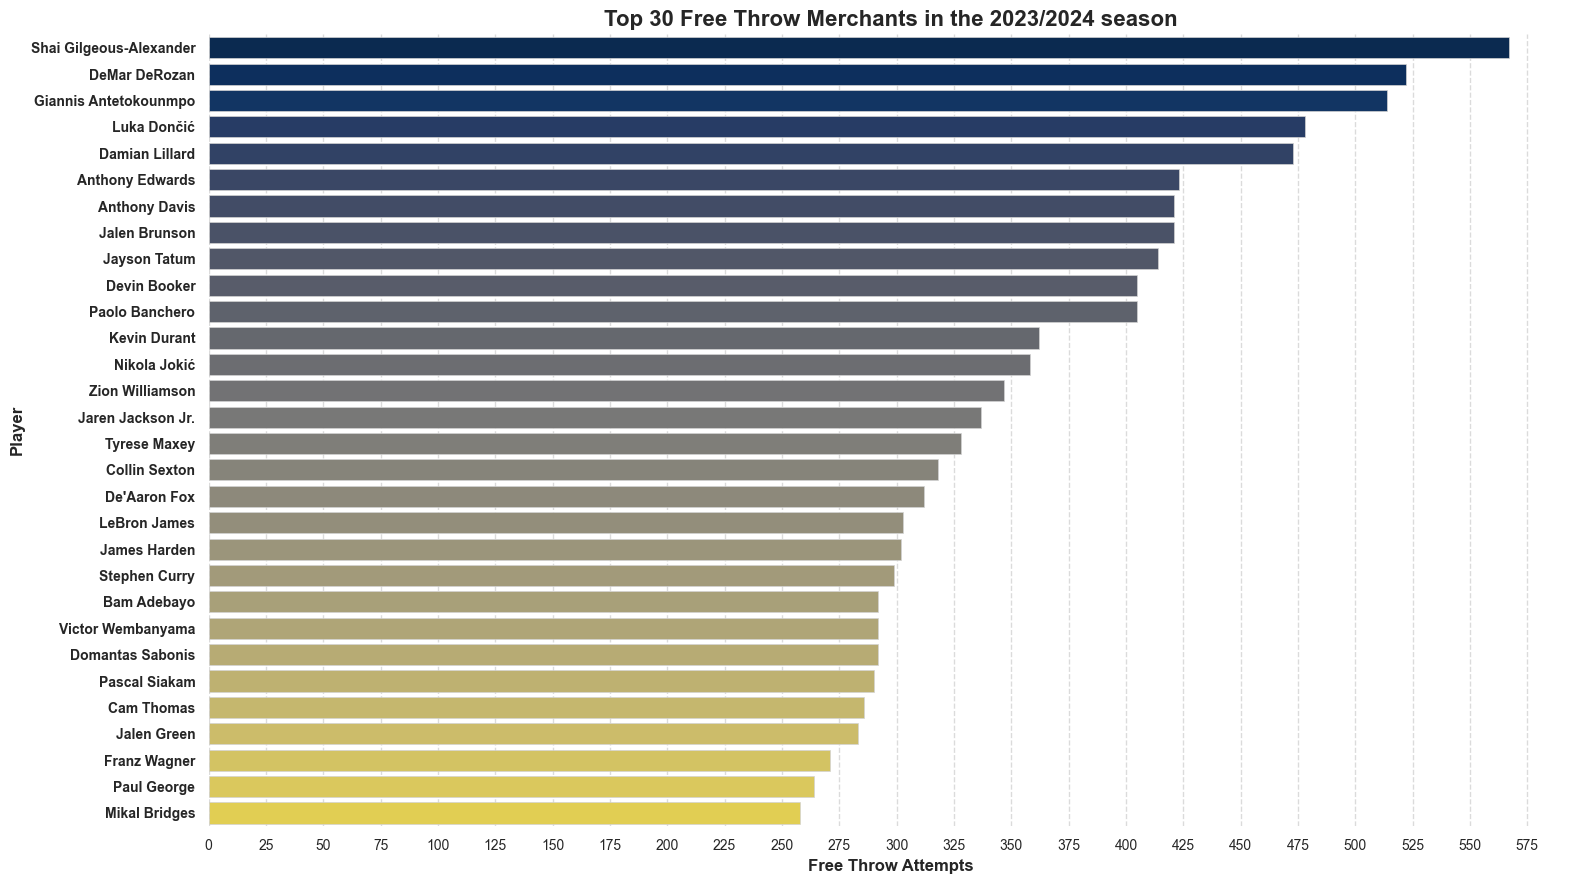

In [143]:
# Set style for better visuals
sns.set_theme(style="white") #Change theme.

# Plot Free Throws (FT) by Player
plt.figure(figsize=(16,9)) #increase figure size.
df_sorted = cleaned_df[(cleaned_df['GP'] > 65)].sort_values('FT', ascending=False).head(30)
print(df_sorted[['Player', 'FT']]) # Print the sorted dataframe for debugging purposes.
palette = sns.color_palette("cividis", n_colors=len(df_sorted['Player'].unique())) #create color palette.
sns.barplot(x='FT', y='Player', data=df_sorted, hue='Player', palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.


plt.title('Top 30 Free Throw Merchants in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Free Throw Attempts', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

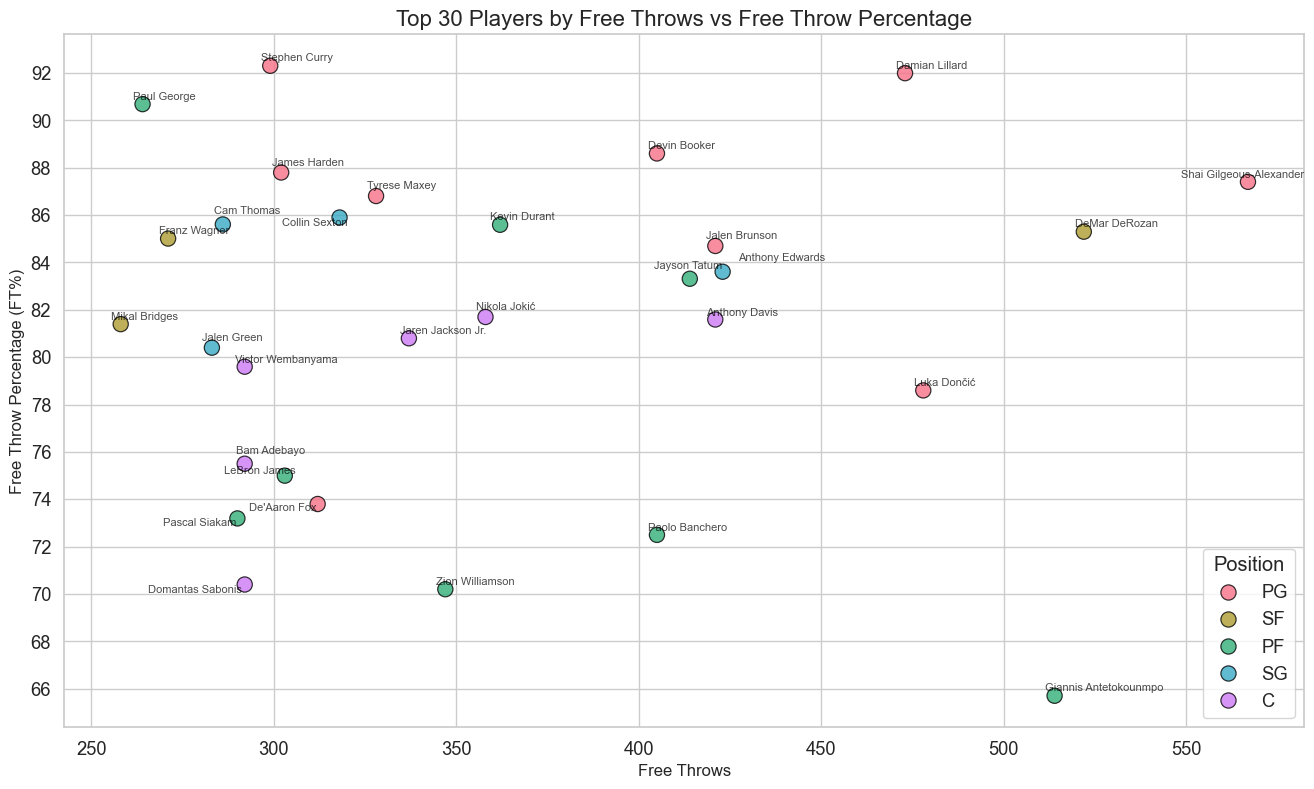

In [144]:
#Scatter Plot 2: FT%  VS FT
top_30_ft = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FT'] > 130)].sort_values(by=['FT','FT%'], ascending=[False,False]).head(30) 

#Define colors based on unique positions.
position_palette = {
    pos:color for pos, color in zip(top_30_ft['Position'].unique(), sns.color_palette('husl', n_colors=top_30_ft['Position'].nunique()))
}
#Add jitter to prevent overlapping points
jitter_x = np.random.normal(0, 0.005, len(top_30_ft['FTA'])) # Add jitter to the x-axis
jitter_y = np.random.normal(0, 0.005, len(top_30_ft['FT%'])) # Add jitter to the y-axis

#Turn the percenatge to decimal for the plot.
top_30_ft['FT%'] = top_30_ft['FT%']  * 100  # Convert FG% to decimal for plotting
plt.figure(figsize=(16,9))

#Set Seaborn style
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

#Scatter plot with color based on position
sns.scatterplot(
    x=top_30_ft['FT'] + jitter_x, 
    y=top_30_ft['FT%'] + jitter_y,
    hue=top_30_ft['Position'],
    palette = position_palette, 
    edgecolor='black',
    s=120,
    alpha=0.8
)

#Set x and y axis major ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(2))

#Annotate points with player names
texts = []
for seq_index, (i, row) in enumerate(top_30_ft.iterrows()):
    texts.append(
        plt.annotate(
            row['Player'],
            (row['FT'] + jitter_x[seq_index], row['FT%'] + jitter_y[seq_index]),
            fontsize=8,
            alpha=0.7,
            ha='right',
            va='bottom',
            color='black'
            )
        )
    
#Adjust the text to prevcent overlapping annotations

adjust_text(texts)
#Titles and labels
plt.title('Top 30 Players by Free Throws vs Free Throw Percentage', fontsize=16)
plt.xlabel('Free Throws', fontsize = 12)
plt.ylabel('Free Throw Percentage (FT%)', fontsize=12)
plt.legend(title = 'Position')
plt.show()


                 Player   3P
37        Stephen Curry  357
18          Luka Dončić  284
47     Donte DiVincenzo  283
55        Klay Thompson  268
30          Paul George  243
42    Bogdan Bogdanović  240
72          CJ McCollum  239
15         Jayson Tatum  229
12        Fred VanVleet  227
32     D'Angelo Russell  226
51        Malik Beasley  224
3         Mikal Bridges  220
24       Damian Lillard  220
26   Michael Porter Jr.  220
71          Buddy Hield  219
13         De'Aaron Fox  214
17         Tyrese Maxey  212
9         Jalen Brunson  211
77     Tim Hardaway Jr.  211
2            Coby White  209
28        Grayson Allen  205
20          Jalen Green  201
6       Dejounte Murray  201
151          Sam Hauser  197
44        Derrick White  196
63    Tyrese Haliburton  195
7       Anthony Edwards  190
120     Duncan Robinson  187
33         James Harden  186
90        Corey Kispert  184


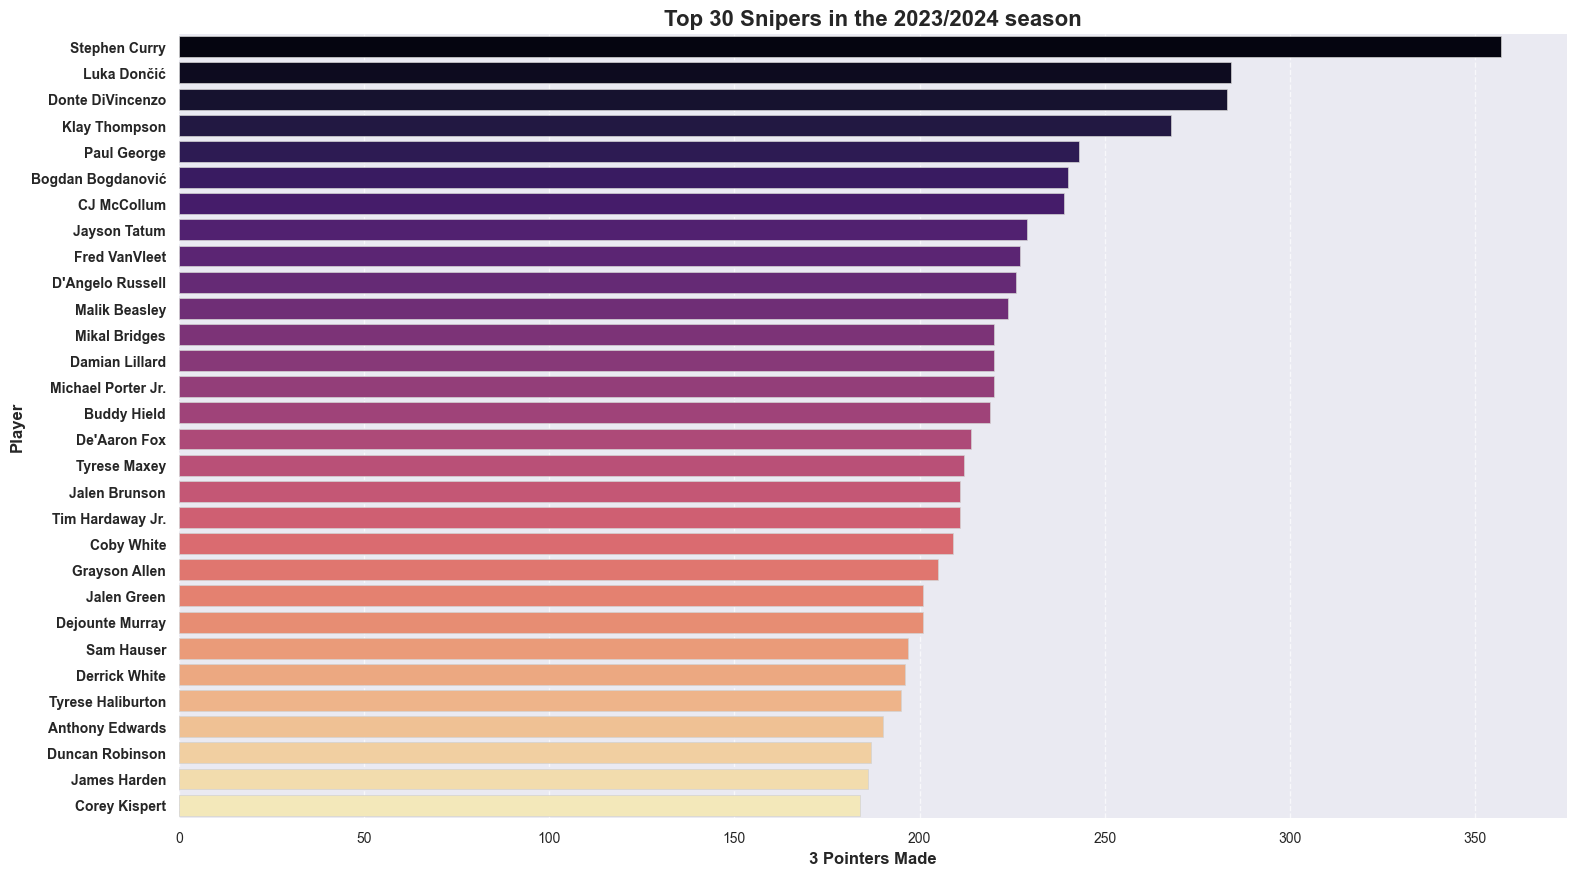

In [145]:
# Set style for better visuals
sns.set_style('darkgrid') #Change theme.

# Plot 3 Point Attempts (3PA) by Player
plt.figure(figsize=(16,9)) #increase figure size.
df_sorted = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['3P'] > 130)].sort_values(by='3P', ascending=False).head(30)
print(df_sorted[['Player', '3P']]) # Print the sorted dataframe for debugging purposes.
palette = sns.color_palette("magma", n_colors = len(df_sorted)) #create color palette.
sns.barplot(x='3P', y='Player', data=df_sorted, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 Snipers in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('3 Pointers Made', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

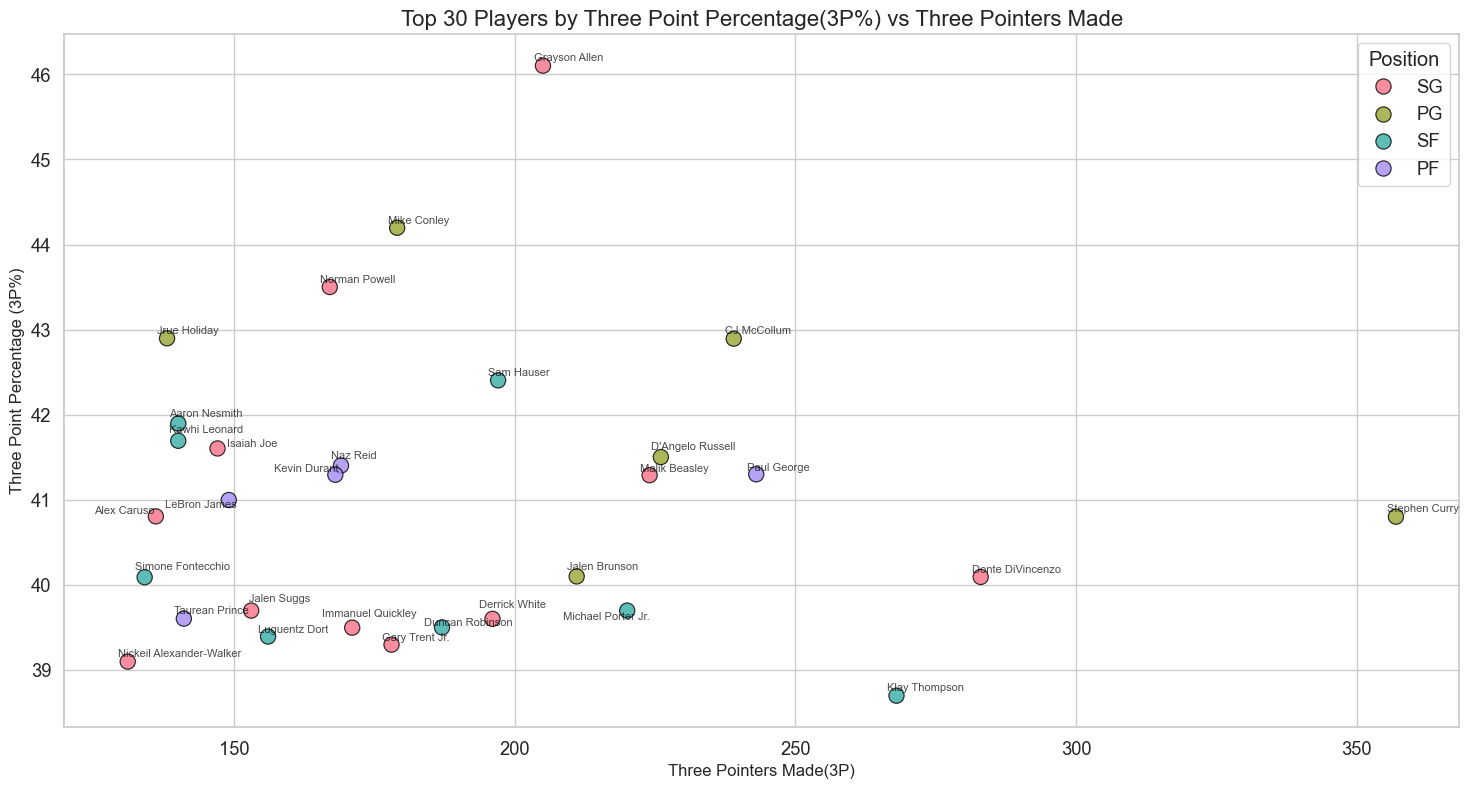

In [146]:
#Scatter Plot 3: Three Point Percentage (3P%) VS Three Pointers (3P)
top_30_3pm = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['3P'] > 130)].sort_values(by=['3P%','3P'], ascending=[False,False]).head(30) # Get the top 30 players by 3P and 3P%

#Define colors based on unique positions.
position_palette = {
    pos:color for pos, color in zip(top_30_3pm['Position'].unique(), sns.color_palette('husl', n_colors=top_30_3pm['Position'].nunique()))
}
#Add jitter to prevent overlapping points
jitter_x = np.random.normal(0, 0.005, len(top_30_3pm['3P'])) # Add jitter to the x-axis
jitter_y = np.random.normal(0, 0.005, len(top_30_3pm['3P%'])) # Add jitter to the y-axis
#Turn the percenatge to decimal for the plot.
top_30_3pm['3P%'] = top_30_3pm['3P%'] * 100
plt.figure(figsize=(18,9))
#Set Seaborn style
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)
#Scatter plot with color based on position
sns.scatterplot(
    x=top_30_3pm['3P'] + jitter_x, 
    y=top_30_3pm['3P%'] + jitter_y,
    hue=top_30_3pm['Position'],
    palette = position_palette, 
    edgecolor='black',
    s=120,
    alpha=0.8
)

#Set x and y axis major ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))




#Annotate points with player names
texts = []
for seq_index, (i, row) in enumerate(top_30_3pm.iterrows()):
    texts.append(
        plt.annotate(
            row['Player'],
            (row['3P'] + jitter_x[seq_index], row['3P%'] + jitter_y[seq_index]),
            fontsize=8,
            alpha=0.7,
            ha='right',
            va='bottom',
            color='black'
            )
        )
#Adjust the text to prevent overlapping annotations
adjust_text(texts)
#Titles and labels
plt.title('Top 30 Players by Three Point Percentage(3P%) vs Three Pointers Made', fontsize=16)
plt.xlabel('Three Pointers Made(3P)', fontsize = 12)
plt.ylabel('Three Point Percentage (3P%)', fontsize=12)
plt.legend(title = 'Position')
plt.show()

                 Player  Unassisted_3PM
37        Stephen Curry           318.0
47     Donte DiVincenzo           275.0
55        Klay Thompson           262.0
42    Bogdan Bogdanović           226.0
30          Paul George           216.0
26   Michael Porter Jr.           216.0
18          Luka Dončić           214.0
72          CJ McCollum           213.0
71          Buddy Hield           211.0
3         Mikal Bridges           208.0
51        Malik Beasley           203.0
32     D'Angelo Russell           200.0
77     Tim Hardaway Jr.           197.0
28        Grayson Allen           196.0
151          Sam Hauser           194.0
44        Derrick White           193.0
2            Coby White           192.0
12        Fred VanVleet           184.0
22        Keegan Murray           181.0
90        Corey Kispert           181.0
120     Duncan Robinson           178.0
15         Jayson Tatum           177.0
13         De'Aaron Fox           177.0
43       Brandon Miller           175.0


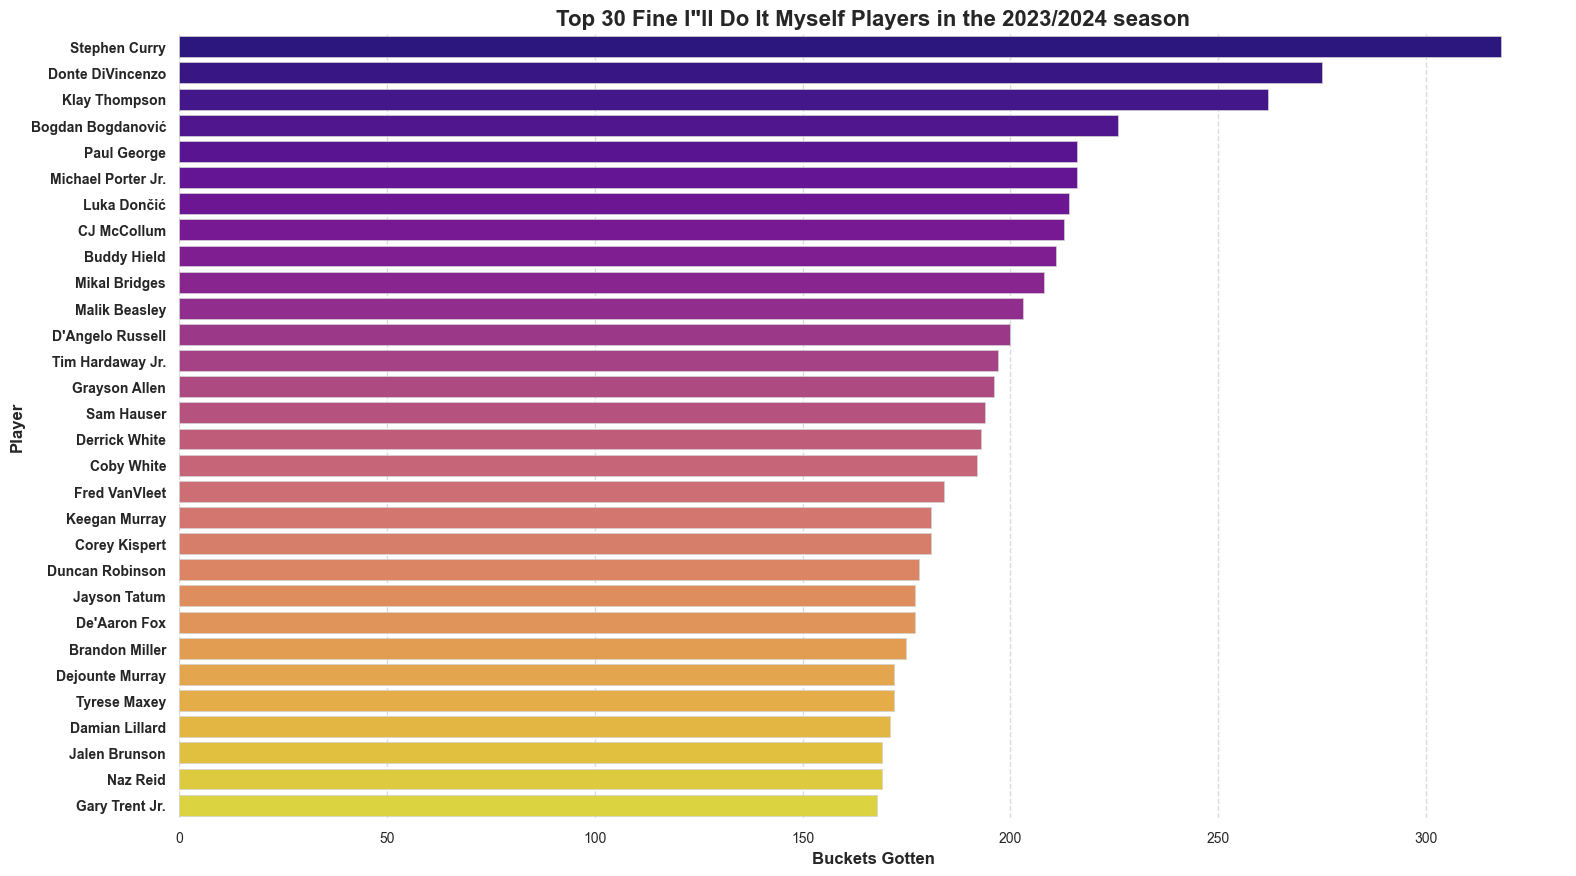

In [147]:
# Plot Unassisted 3's by Player
plt.figure(figsize=(16,9)) #increase figure size.

df_sorted = cleaned_df[(cleaned_df['GP'] > 65)].sort_values('Unassisted_3PM', ascending=False).head(30)
print(df_sorted[['Player', 'Unassisted_3PM']]) # Print the sorted dataframe for debugging purposes.

palette = sns.color_palette("plasma", n_colors= len(df_sorted['Player'].unique())) #create color palette.
sns.barplot(x='Unassisted_3PM', y='Player', data=df_sorted, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 Fine I"ll Do It Myself Players in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Buckets Gotten', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

                      Player  Unassisted_2PM
25     Giannis Antetokounmpo           754.0
8               Nikola Jokić           696.0
11             Anthony Davis           651.0
27   Shai Gilgeous-Alexander           623.0
68           Zion Williamson           565.0
1           Domantas Sabonis           562.0
14             Pascal Siakam           547.0
5               Kevin Durant           534.0
0              DeMar DeRozan           503.0
9              Jalen Brunson           502.0
35             Jarrett Allen           501.0
29              LeBron James           480.0
38               Bam Adebayo           472.0
19            Nikola Vučević           468.0
7            Anthony Edwards           461.0
4             Paolo Banchero           457.0
18               Luka Dončić           438.0
34              Devin Booker           427.0
13              De'Aaron Fox           426.0
49              Jaylen Brown           425.0
52             Kawhi Leonard           415.0
56        

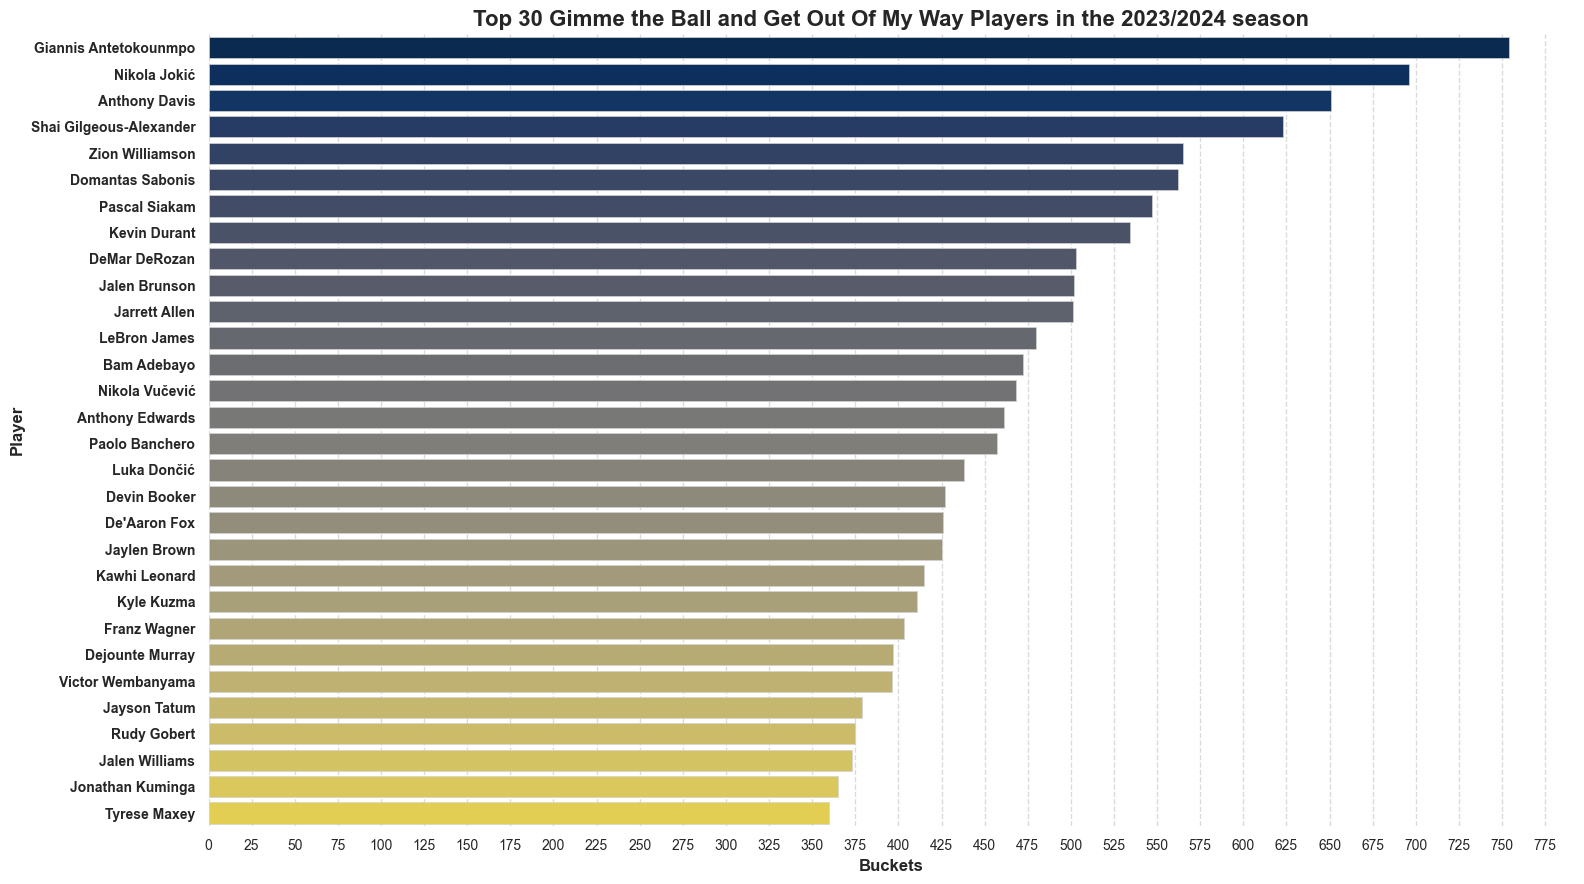

In [148]:
# Set style for better visuals
sns.set_theme(style="white") #Change theme.

# Plot Unassisted 2's by Player
plt.figure(figsize=(16,9)) #increase figure size.
df_sorted = cleaned_df[(cleaned_df['GP'] > 65)].sort_values('Unassisted_2PM', ascending=False).head(30)
print(df_sorted[['Player', 'Unassisted_2PM']]) # Print the sorted dataframe for debugging purposes.
palette = sns.color_palette("cividis", n_colors=len(df_sorted['Player'].unique())) #create color palette.
sns.barplot(x='Unassisted_2PM', y='Player', data=df_sorted, hue='Player', palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.


plt.title('Top 30 Gimme the Ball and Get Out Of My Way Players in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Buckets', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

                    Player  Dunks
25   Giannis Antetokounmpo    251
21             Rudy Gobert    248
11           Anthony Davis    196
140         Daniel Gafford    177
78             Nic Claxton    172
54            Aaron Gordon    171
35           Jarrett Allen    170
81       Victor Wembanyama    165
127           Clint Capela    144
112       Jonathan Kuminga    138
39           Chet Holmgren    137
38             Bam Adebayo    134
148           Kelly Olynyk    120
141            Ivica Zubac    112
239   Trayce Jackson-Davis    112
1         Domantas Sabonis    111
154             Obi Toppin    101
123     Isaiah Hartenstein     86
15            Jayson Tatum     86
92         Kelly Oubre Jr.     86
29            LeBron James     84
4           Paolo Banchero     80
68         Zion Williamson     78
135          Rui Hachimura     77
49            Jaylen Brown     76
52           Kawhi Leonard     76
5             Kevin Durant     75
286           Jaxson Hayes     75
22           K

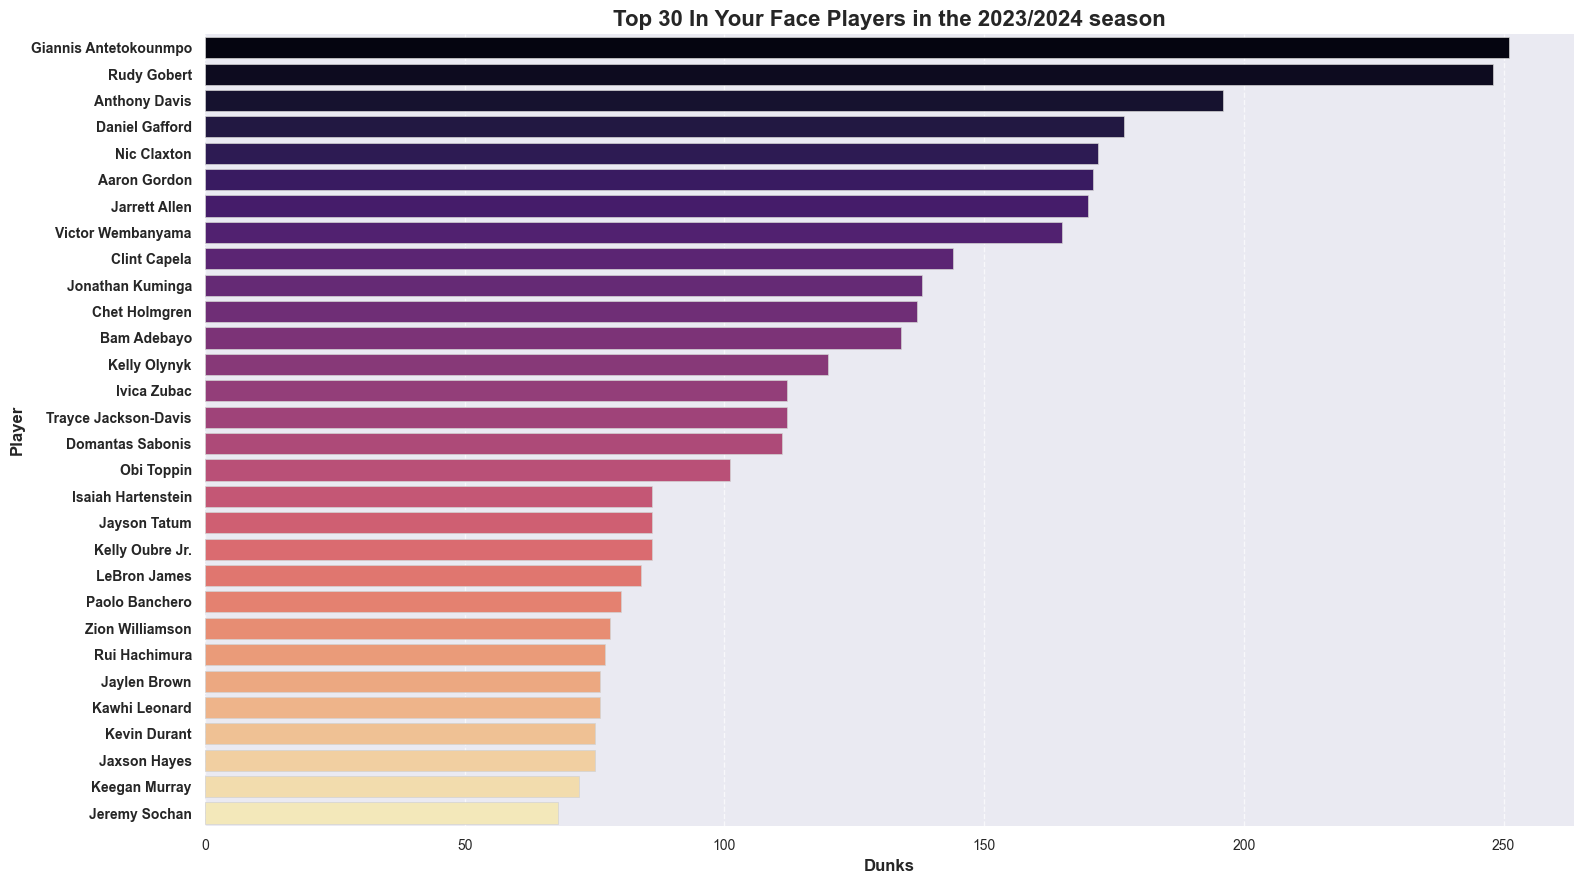

In [149]:

# Set style for better visuals
sns.set_style('darkgrid') #Change theme.

# Plot Dunks by Player
plt.figure(figsize=(16,9)) #increase figure size.
df_sorted = cleaned_df[(cleaned_df['GP'] > 65)].sort_values(by='Dunks', ascending=False).head(30)
print(df_sorted[['Player', 'Dunks']]) # Print the sorted dataframe for debugging purposes.
palette = sns.color_palette("magma", n_colors = len(df_sorted)) #create color palette.
sns.barplot(x='Dunks', y='Player', data=df_sorted, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 In Your Face Players in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Dunks', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

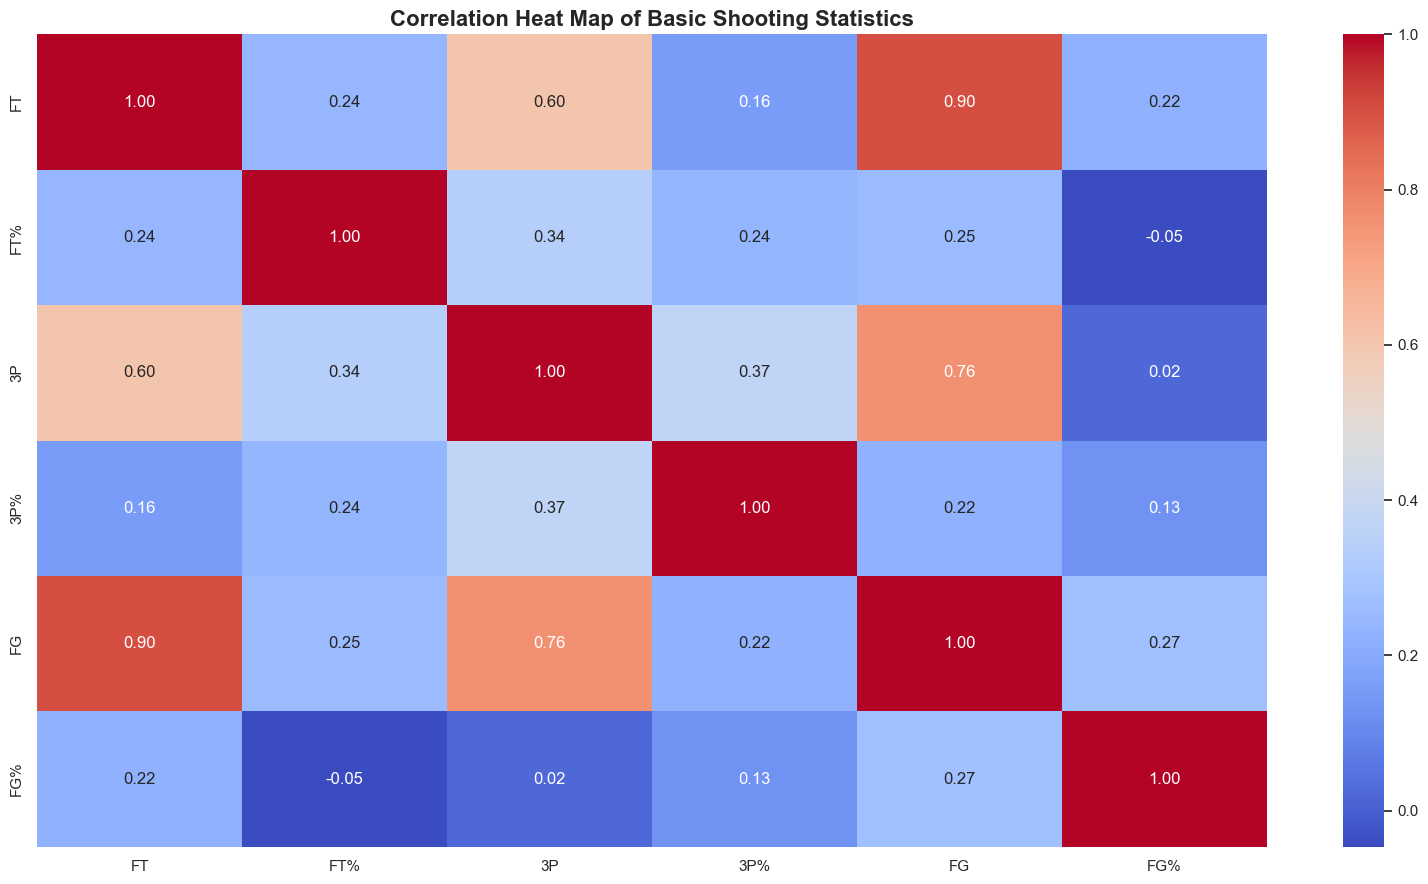

In [150]:
#Correlation Heatmap
#Lets see which basic stats are correlated with each other.

plt.figure(figsize=(16,9))
#Calculate the correlation matrix
correlation_matrix = cleaned_df[['FT','FT%','3P','3P%','FG','FG%']].corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heat Map of Basic Shooting Statistics', fontsize=16, fontweight='bold')
plt.tight_layout() # Adjust layout to make room for the title
# Show the plot
plt.show()


                    Player   eFG%
140         Daniel Gafford  0.725
239   Trayce Jackson-Davis  0.702
149          Nick Richards  0.691
154             Obi Toppin  0.661
21             Rudy Gobert  0.661
141            Ivica Zubac  0.649
28           Grayson Allen  0.649
123     Isaiah Hartenstein  0.645
223          Aaron Wiggins  0.645
198          Moritz Wagner  0.636
35           Jarrett Allen  0.634
78             Nic Claxton  0.630
25   Giannis Antetokounmpo  0.624
151             Sam Hauser  0.623
148           Kelly Olynyk  0.616
8             Nikola Jokić  0.612
135          Rui Hachimura  0.609
1         Domantas Sabonis  0.609
194             Isaiah Joe  0.609
232           Drew Eubanks  0.607
104          Aaron Nesmith  0.606
90           Corey Kispert  0.602
159          Cason Wallace  0.602
29            LeBron James  0.599
51           Malik Beasley  0.598
39           Chet Holmgren  0.598
227           Kevon Looney  0.597
69             Mike Conley  0.595
53           H

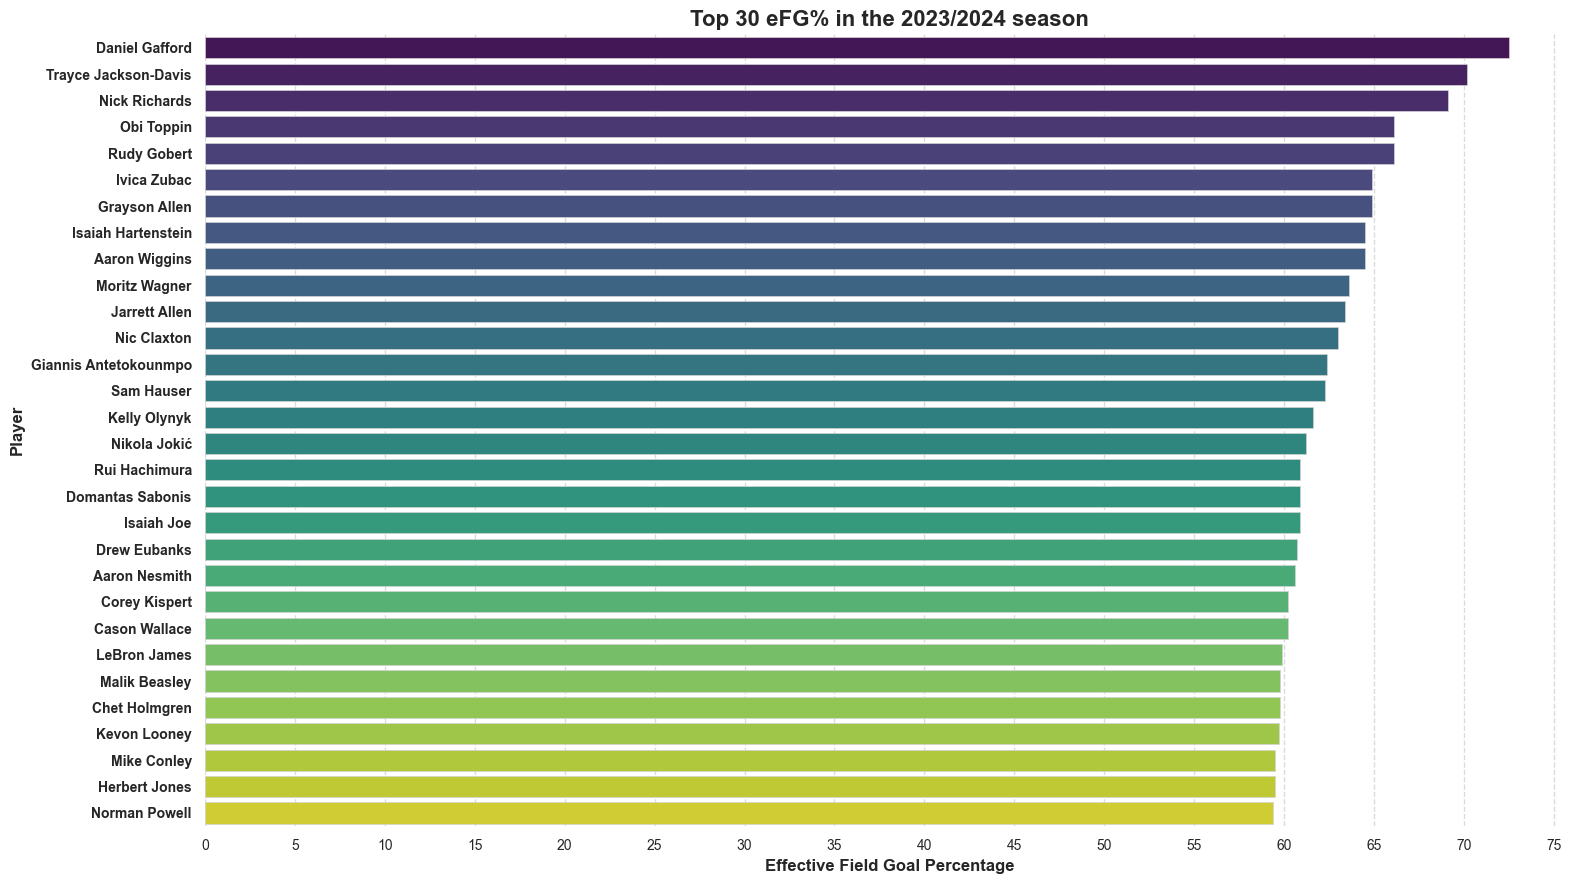

In [151]:
#eFG% visualization
sns.set_theme(style="white") #Change theme.

# Plot Effective Field Goal Percentage (eFG%) by Player
plt.figure(figsize=(16, 9)) #increase figure size.

# Filter the dataframe to only include players with more than 328 FGA for a meaningful eFG% calculation.
df_sorted = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FG'] > 130)].sort_values('eFG%', ascending=False).head(30)

print(df_sorted[['Player', 'eFG%']]) # Print the sorted dataframe for debugging purposes.

# Ensure eFG% is in the correct format for plotting.
df_sorted['eFG%'] = df_sorted['eFG%'] * 100 # Convert eFG% to percentage for better readability in the plot.

palette = sns.color_palette("viridis", len(df_sorted)) #create color palette.
sns.barplot(x='eFG%', y='Player', data=df_sorted, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 eFG% in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Effective Field Goal Percentage', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

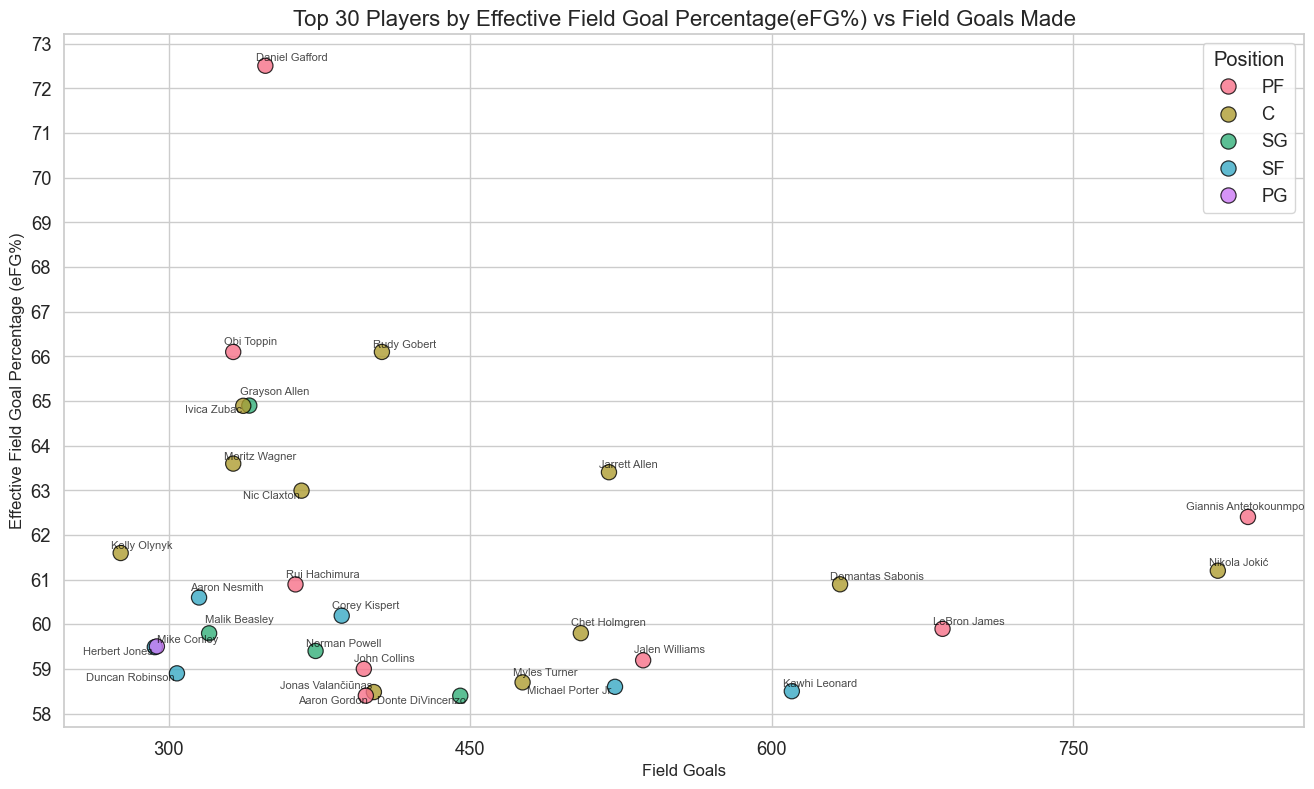

In [ ]:
#Exploratory Data Analysis with Advanced Stats. 
#Scatter Plot 4: eFG% VS FGA_per_game
top_30_efg = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FG'] > 260)].sort_values(by='eFG%', ascending=False).head(30) 

#Define colors based on unique positions.
position_palette = {
    pos:color for pos, color in zip(top_30_efg['Position'].unique(), sns.color_palette('husl', n_colors=top_30_efg['Position'].nunique()))
}

#Add jitter to prevent overlapping points
jitter_x = np.random.normal(0, 0.005, len(top_30_efg['FG'])) # Add jitter to the x-axis
jitter_y = np.random.normal(0, 0.005, len(top_30_efg['eFG%'])) # Add jitter to the y-axis


#Turn the percenatge to decimal for the plot.
top_30_efg['eFG%'] = top_30_efg['eFG%'] * 100  # Convert eFG% to decimal for plotting


plt.figure(figsize=(16, 9))

#Set Seaborn style
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)



#Scatter plot with color based on position
sns.scatterplot(
    x=top_30_efg['FG'] + jitter_x, 
    y=top_30_efg['eFG%'] + jitter_y,
    hue=top_30_efg['Position'],
    palette = position_palette, 
    edgecolor='black',
    s=120,
    alpha=0.8
)
#Set x and y axis major ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

#Annotate points with player names
texts = []
for seq_index, (i, row) in enumerate(top_30_efg.iterrows()):
    texts.append(
        plt.annotate(
            row['Player'],
            (row['PTS'] + jitter_x[seq_index], row['eFG%'] + jitter_y[seq_index]),
            fontsize=8,
            alpha=0.7,
            ha='right',
            va='bottom',
            color='black'
            )
        )
#Adjust the text to prevent overlapping annotations
adjust_text(texts)
#Titles and labels
plt.title('Top 30 Players by Effective Field Goal Percentage(eFG%) vs Field Goals Made', fontsize=16)
plt.xlabel('Field Goals', fontsize = 12)
plt.ylabel('Effective Field Goal Percentage (eFG%)', fontsize=12)
plt.legend(title = 'Position')
plt.show()

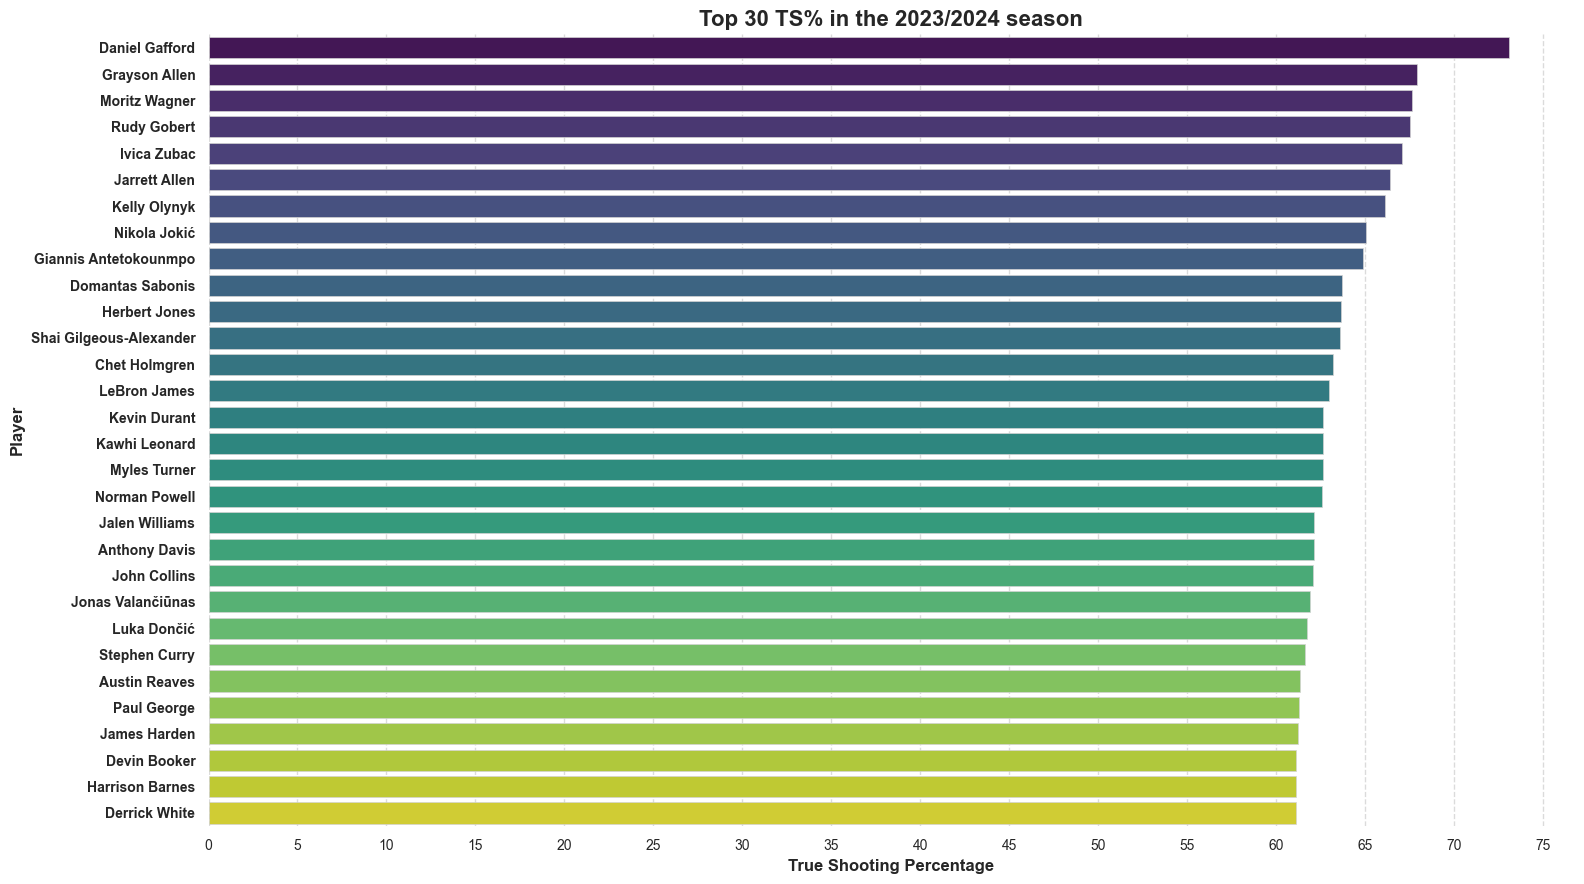

In [202]:
sns.set_theme(style="white") #Change theme.

# Plot True Shooting Percentage (TS%) by Player
plt.figure(figsize=(16, 9)) #increase figure size.

# Filter the dataframe to only include players with more than 260 FGA for a meaningful eFG% calculation.
df_sorted = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FG'] > 260) & (cleaned_df['FT'] > 115)].sort_values('TS%', ascending=False).head(30)

palette = sns.color_palette("viridis", len(df_sorted)) #create color palette.
sns.barplot(x='TS%', y='Player', data=df_sorted, hue='Player', palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 TS% in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('True Shooting Percentage', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

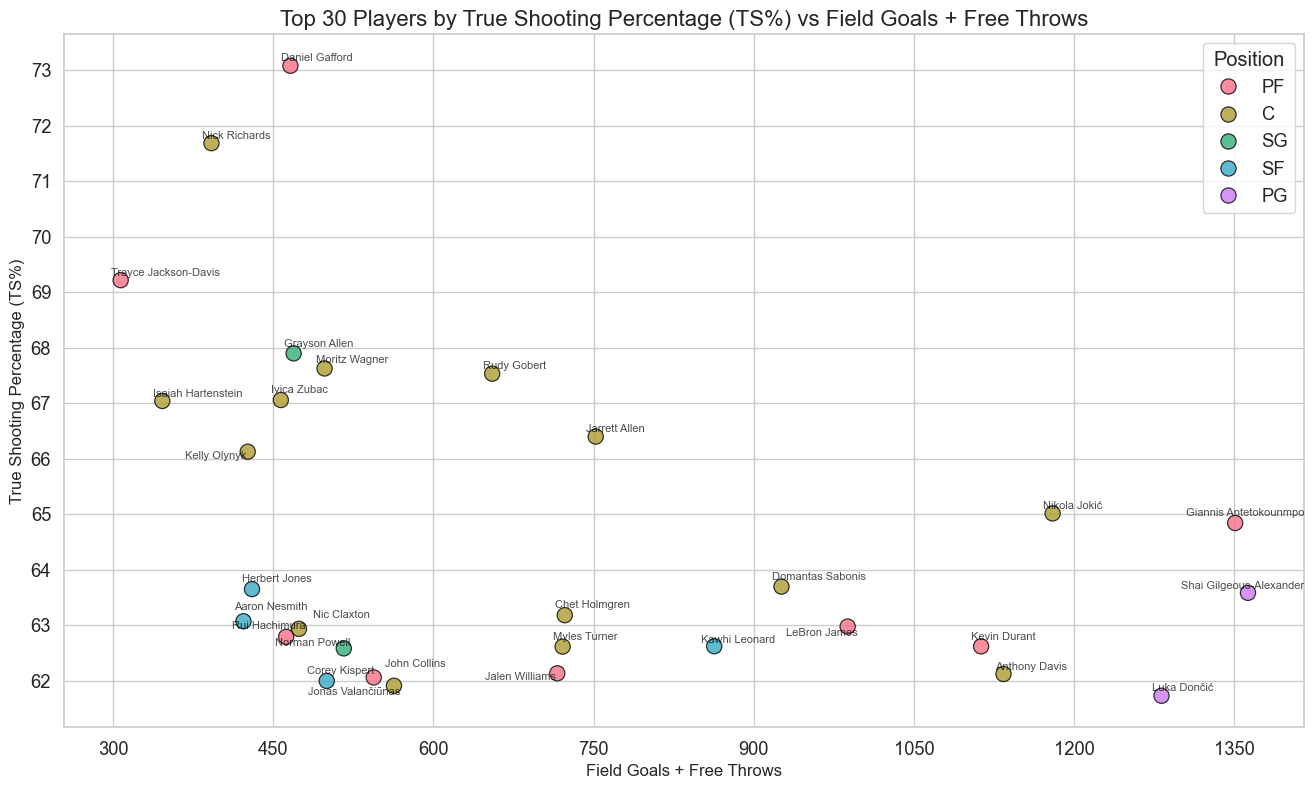

In [204]:
#Scatter Plot 5: True Shooting Percentage (TS%) VS Field Goals + Free Throws
top_30_ts = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FGA'] > 260) & (cleaned_df['FTA'] > 115)].sort_values(by='TS%', ascending=False).head(30) # Get the top 30 players by TS% with a minimum of 1 FGA per game to ensure we are looking at players with a significant number of attempts.

#Define colors based on unique positions.
position_palette = {
    pos:color for pos, color in zip(top_30_ts['Position'].unique(), sns.color_palette('husl', n_colors=top_30_ts['Position'].nunique()))
}
#Add jitter to prevent overlapping points
jitter_x = np.random.normal(0, 0.005, len(top_30_ts['FG'])) # Add jitter to the x-axis
jitter_y = np.random.normal(0, 0.005, len(top_30_ts['TS%'])) # Add jitter to the y-axis


plt.figure(figsize=(16,9))
#Set Seaborn style
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)
#Scatter plot with color based on position
sns.scatterplot(
    x=top_30_ts['FG'] + top_30_ts['FT'] + jitter_x,
    y=top_30_ts['TS%'] + jitter_y, 
    hue=top_30_ts['Position'],
    palette=position_palette, #Use the defined palette for colors based on position
    edgecolor='black',
    s=120, #size of the points
    alpha=0.8
)

#Set x and y axis major ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))

#Annotate the points with player names
texts = []
for seq_index, (i, row) in enumerate(top_30_ts.iterrows()):
    texts.append(
        plt.annotate(
            row['Player'],
            (row['FG'] + row['FT']+ jitter_x[seq_index], row['TS%'] + jitter_y[seq_index]),
            fontsize=8,
            alpha=0.7,
            ha='right', #horizontal alignment
            va='bottom', #vertical alignment
            color='black' #text color
            )
        )
#Adjust the text to prevent overlapping annotations
adjust_text(texts)
#Titles and labels
plt.title('Top 30 Players by True Shooting Percentage (TS%) vs Field Goals + Free Throws', fontsize=16)
plt.xlabel('Field Goals + Free Throws', fontsize=12)
plt.ylabel('True Shooting Percentage (TS%)', fontsize=12)
plt.legend(title='Position')
plt.show()

In [183]:
#New metric added to the analysis: Shooting Influence Score (SIS) (developed Kolade Akinjolire, Grok AI & DeepSeek)

#Normalize compnents
cleaned_df['Dunks%_norm'] = (cleaned_df['Dunks%'] - cleaned_df['Dunks%'].min()) / (cleaned_df['Dunks%'].max() - cleaned_df['Dunks%'].min()) # Normalize Dunks%
cleaned_df['3P_Unassisted%_norm'] = (cleaned_df['3P_Unassisted%'] - cleaned_df['3P_Unassisted%'].min()) / (cleaned_df['3P_Unassisted%'].max() - cleaned_df['3P_Unassisted%'].min()) # Normalize 3P Unassisted%
cleaned_df['2P_Unassisted%_norm'] = (cleaned_df['2P_Unassisted%'] - cleaned_df['2P_Unassisted%'].min()) / (cleaned_df['2P_Unassisted%'].max() - cleaned_df['2P_Unassisted%'].min()) # Normalize Long Midrange%


#Shot location Weights
weights = {'3P_Unassisted%_norm': 0.44,
            '2P_Unassisted%_norm':0.32,
            'Dunks%_norm': 0.24}

#Difficulty Score Calculation:
cleaned_df['Difficulty_Score'] = sum(weights[col] * cleaned_df[col] for col in weights.keys()) # Calculate the weighted sum for the Difficulty Score

# Scale to [0.8, 1.2] based on percentile ranks:
cleaned_df['shot_difficulty_weight'] = 0.8 + 0.4 * cleaned_df['Difficulty_Score'].rank(pct=True)

#Calculate Bonuses

#2P Bonus
cleaned_df['unassisted_2p_bonus'] = np.where(
    cleaned_df['2P_Unassisted%'] > cleaned_df['2P_Assisted%'],
    0.1 * (cleaned_df['2P_Unassisted%'] - cleaned_df['2P_Assisted%']),  # Bonus scales with efficiency gap
    0.0
)

#3P Bonus
cleaned_df['unassisted_3p_bonus'] = np.where(
    cleaned_df['3P_Unassisted%'] > cleaned_df['3P_Assisted%'],
    0.2 * (cleaned_df['3P_Unassisted%'] - cleaned_df['3P_Assisted%']),  # Bonus scales with efficiency gap
    0.0 
)

#Freethrow Bonus
league_avg_ft_per_game = cleaned_df['FT_Per_Game'].median()
cleaned_df['ft_bonus'] = np.where(
    cleaned_df['FT_Per_Game'] > league_avg_ft_per_game,
    0.05 * (cleaned_df['FT_Per_Game'] - league_avg_ft_per_game),
    0.0
)

# Calculate the Shooting Influence Score (SIS)
cleaned_df['SIS'] = (
    (cleaned_df['FG_Per_Game']  * cleaned_df['FG%'] * cleaned_df['shot_difficulty_weight'] *  cleaned_df['unassisted_2p_bonus'])+
    (cleaned_df['3P_Per_Game'] * cleaned_df['3P%'] * 1.5 * cleaned_df['shot_difficulty_weight'] * cleaned_df['unassisted_3p_bonus']) + 
    (cleaned_df['FT_Per_Game'] * cleaned_df['FT%'] * cleaned_df['ft_bonus']) 
  
)

# Round the SIS for better readability
cleaned_df['SIS'] = round(cleaned_df['SIS'], 2)  # Round to 2 decimal places for clarity.

# Sort by SIS and get the top 30 players
top_30_sis = cleaned_df[cleaned_df['GP']> 65].sort_values(by='SIS', ascending=False).head(30)

# Display the top 30 players with their SI and other relevant columns for context
print('Players with the Top 30 SI in the 2023/2024 Season: \n', top_30_sis[['Player', 'SIS']])



Players with the Top 30 SI in the 2023/2024 Season: 
                      Player   SIS
27  Shai Gilgeous-Alexander  2.66
18              Luka Dončić  2.28
24           Damian Lillard  1.93
0             DeMar DeRozan  1.84
34             Devin Booker  1.51
25    Giannis Antetokounmpo  1.45
9             Jalen Brunson   1.4
15             Jayson Tatum  1.28
7           Anthony Edwards  1.19
11            Anthony Davis  1.08
17             Tyrese Maxey  0.95
4            Paolo Banchero  0.91
76        Jaren Jackson Jr.   0.9
13             De'Aaron Fox  0.86
5              Kevin Durant  0.84
33             James Harden  0.83
68          Zion Williamson  0.76
87               Cam Thomas  0.72
37            Stephen Curry   0.7
8              Nikola Jokić   0.7
29             LeBron James  0.64
88            Collin Sexton  0.63
81        Victor Wembanyama  0.55
52            Kawhi Leonard  0.54
38              Bam Adebayo  0.52
30              Paul George   0.5
50             Franz Wagner 

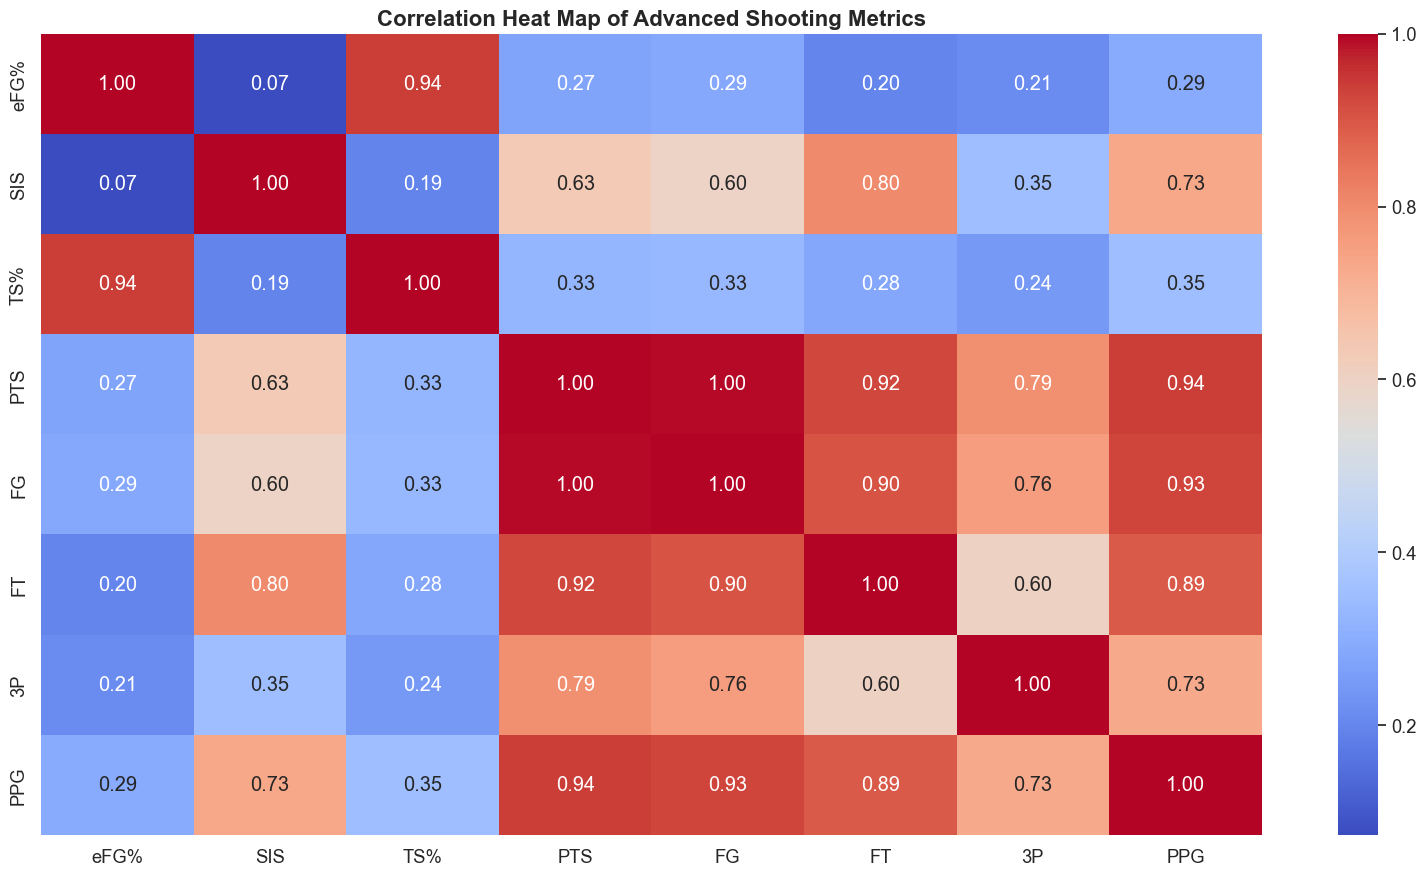

In [214]:
#Advanced Stats Correlation Heatmap
plt.figure(figsize=(16,9))
#Calculate the correlation matrix
percentage_correlation_matrix = cleaned_df[['eFG%','SIS','TS%','PTS','FG','FT','3P','PPG']].corr() 
sns.heatmap(percentage_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heat Map of Advanced Shooting Metrics', fontsize=16, fontweight='bold')
plt.tight_layout() # Adjust layout to make room for the title
# Show the plot
plt.show()


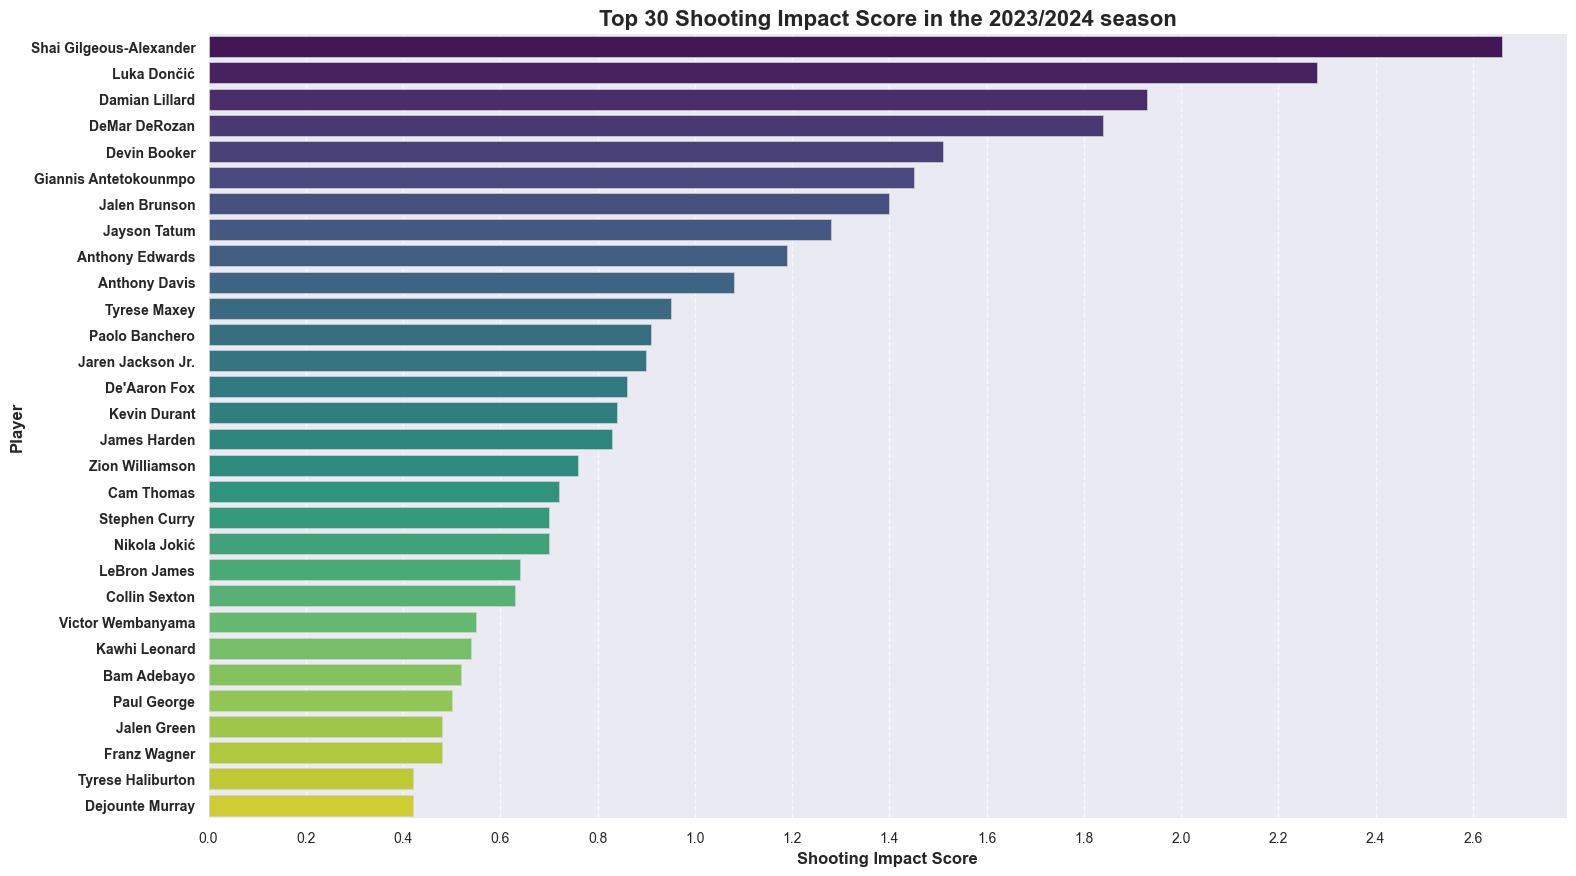

In [186]:
# Plot Shooting Impact Percentage (SI%) by Player

# Filter the dataframe to only include players with more than 328 FGA for a meaningful SI calculation.
top_30_sis = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FG'] > 260)].sort_values(by='SIS', ascending=False).head(30) 

plt.figure(figsize=(16, 9)) #increase figure size.
palette = sns.color_palette("viridis", len(df_sorted)) #create color palette.


sns.barplot(x='SIS', y='Player', data=top_30_sis, hue='Player', palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2)) # Set x-axis major ticks to every 5 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top 30 Shooting Impact Score in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('Shooting Impact Score', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

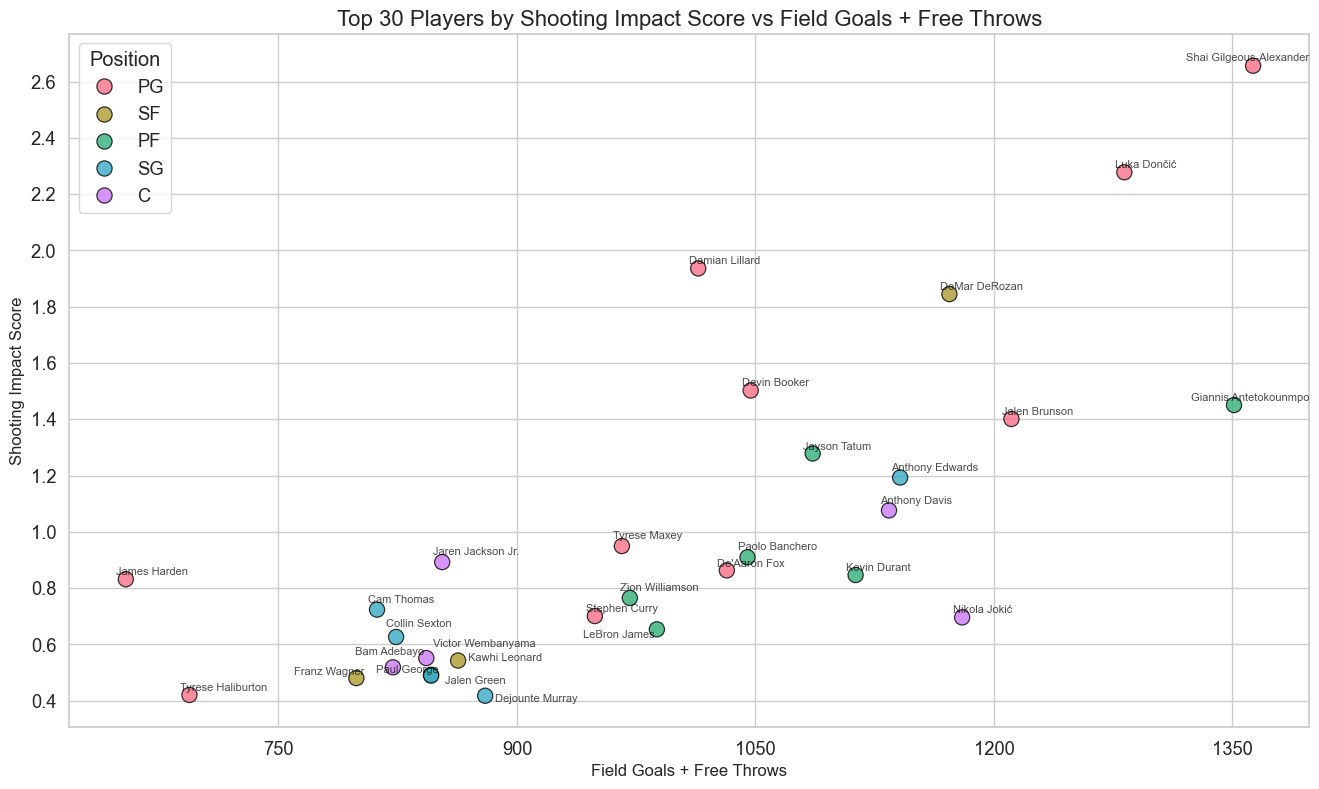

In [210]:
#Scatter Plot 5: Shooting Impact Percentage (TS%) VS FGA
top_30_sis = cleaned_df[(cleaned_df['GP'] > 65) & (cleaned_df['FG'] > 260)].sort_values(by='SIS', ascending=False).head(30) 

#Define colors based on unique positions.
position_palette = {
    pos:color for pos, color in zip(top_30_sis['Position'].unique(), sns.color_palette('husl', n_colors=top_30_sis['Position'].nunique()))
}
#Add jitter to prevent overlapping points
jitter_x = np.random.normal(0, 0.005, len(top_30_sis['FG'])) # Add jitter to the x-axis
jitter_y = np.random.normal(0, 0.005, len(top_30_sis['SIS'])) # Add jitter to the y-axis


plt.figure(figsize=(16,9))
#Set Seaborn style
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)
#Scatter plot with color based on position
sns.scatterplot(
    x=top_30_sis['FG'] + top_30_sis['FT'] + jitter_x,
    y=top_30_sis['SIS'] + jitter_y, 
    hue=top_30_sis['Position'],
    palette=position_palette, #Use the defined palette for colors based on position
    edgecolor='black',
    s=120, #size of the points
    alpha=0.8
)

#Set x and y axis major ticks
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(150))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))

#Annotate the points with player names
texts = []
for seq_index, (i, row) in enumerate(top_30_sis.iterrows()):
    texts.append(
        plt.annotate(
            row['Player'],
            (row['FG'] + row['FT']+ jitter_x[seq_index], row['SIS'] + jitter_y[seq_index]),
            fontsize=8,
            alpha=0.7,
            ha='right', #horizontal alignment
            va='bottom', #vertical alignment
            color='black' #text color
            )
        )
#Adjust the text to prevent overlapping annotations
adjust_text(texts)
#Titles and labels
plt.title('Top 30 Players by Shooting Impact Score vs Field Goals + Free Throws', fontsize=16)
plt.xlabel('Field Goals + Free Throws', fontsize=12)
plt.ylabel('Shooting Impact Score', fontsize=12)
plt.legend(title='Position')
plt.show()

                Player   SIS  Age    MP
18         Luka Dončić  2.28   24  2624
7      Anthony Edwards  1.19   22  2770
17        Tyrese Maxey  0.95   23  2626
4       Paolo Banchero  0.91   21  2799
76   Jaren Jackson Jr.   0.9   24  2124
68     Zion Williamson  0.76   23  2207
87          Cam Thomas  0.72   22  2075
81   Victor Wembanyama  0.55   20  2106
50        Franz Wagner  0.48   22  2337
20         Jalen Green  0.48   21  2601
63   Tyrese Haliburton  0.42   23  2224
2           Coby White  0.38   23  2881
107  Immanuel Quickley  0.37   24  1985
66          Jaden Ivey  0.28   21  2217
64      Jalen Williams  0.27   22  2223
112   Jonathan Kuminga  0.25   21  1949
48        Jordan Poole  0.24   24  2346
101     Keyonte George  0.24   20  2023
39       Chet Holmgren   0.2   21  2413
58         Deni Avdija  0.19   23  2257
97      Keldon Johnson  0.18   24  2038
138       Cole Anthony  0.17   23  1817
59       Devin Vassell  0.15   23  2248
43      Brandon Miller   0.1   21  2383


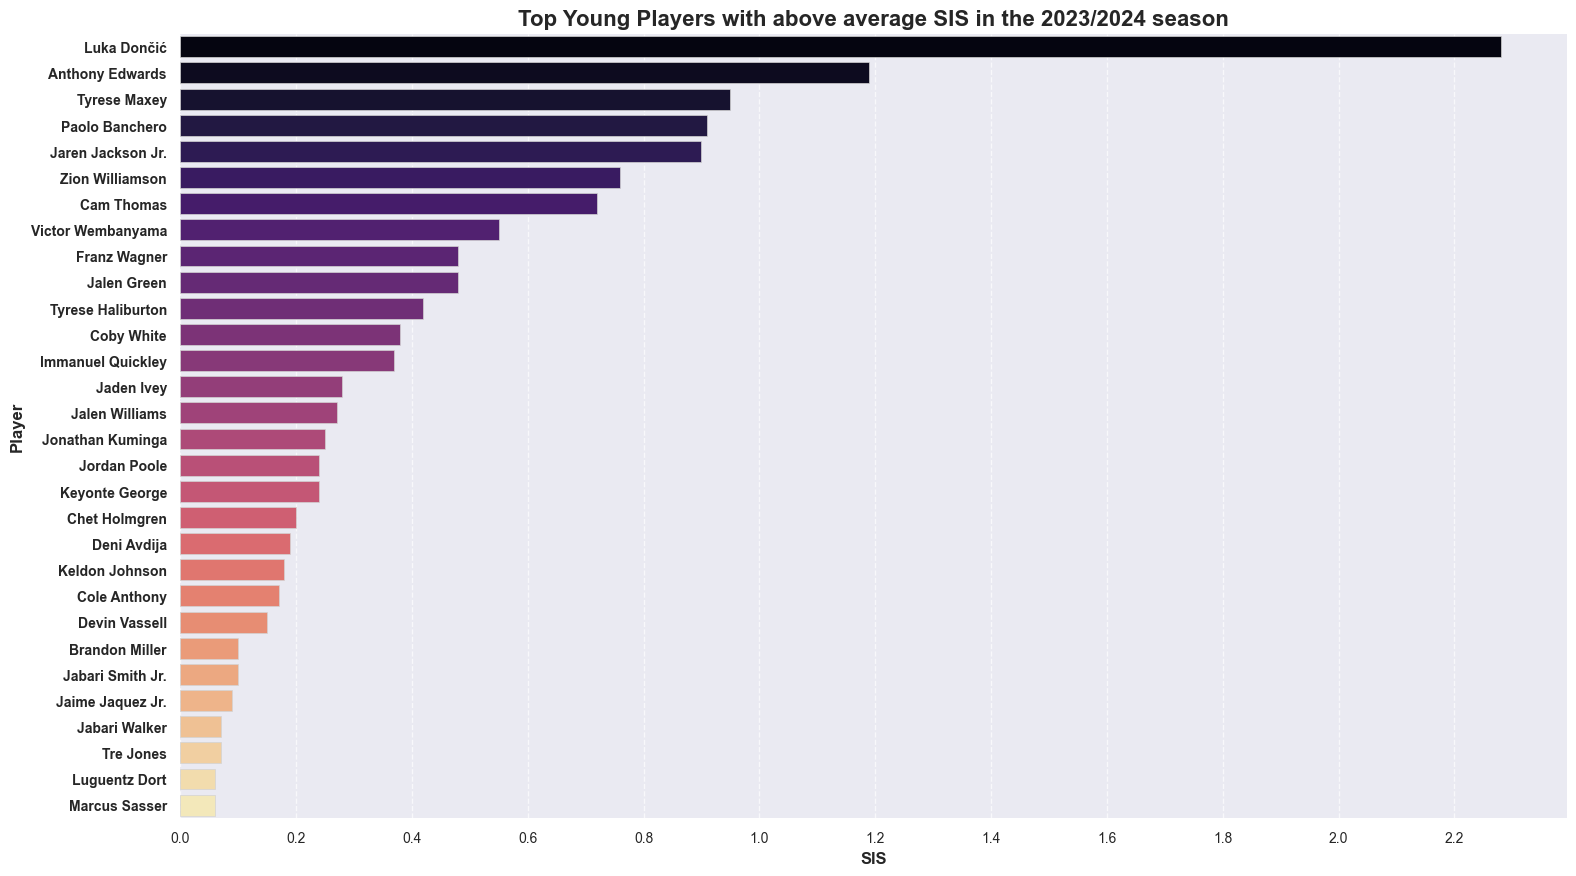

In [190]:
# Young Players
league_avg_age = cleaned_df['Age'].median()
league_avg_sis = cleaned_df['SIS'].median()

young_df = cleaned_df[(cleaned_df['Age'] < league_avg_age) & (cleaned_df['SIS'] > league_avg_sis) & (cleaned_df['GP'] > 65)].sort_values(by='SIS', ascending=False).head(30)
# Set style for better visuals
sns.set_style('darkgrid') #Change theme.

# Plot 3 Point Attempts (3PA) by Player
plt.figure(figsize=(16,9)) #increase figure size.
print(young_df[['Player', 'SIS','Age','MP']]) # Print the sorted dataframe for debugging purposes.
palette = sns.color_palette("magma", n_colors = len(young_df)) #create color palette.
sns.barplot(x='SIS', y='Player', data=young_df, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.2)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top Young Players with above average SIS in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('SIS', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()

League Average minutes played:  878.5
League Average SIS:  0.01
               Player   SIS   MP
301      Jake LaRavia  0.19  806
328  Danilo Gallinari  0.07  630
318     Jacob Gilyard  0.05  699
290    Christian Wood  0.05  872
353      Bones Hyland  0.05  540
345      Jared Butler  0.04  566
323     Mason Plumlee  0.04  674
288      Blake Wesley  0.04  876
317     Chris Boucher  0.04  705
294   Trendon Watford  0.04  856
326  Craig Porter Jr.  0.03  649
364      Monte Morris  0.03  476
374       Skylar Mays  0.03  433
312    Nick Smith Jr.  0.02  729
310         Ish Smith  0.02  741
293     Chimezie Metu  0.02  859
379     Trent Forrest  0.02  414


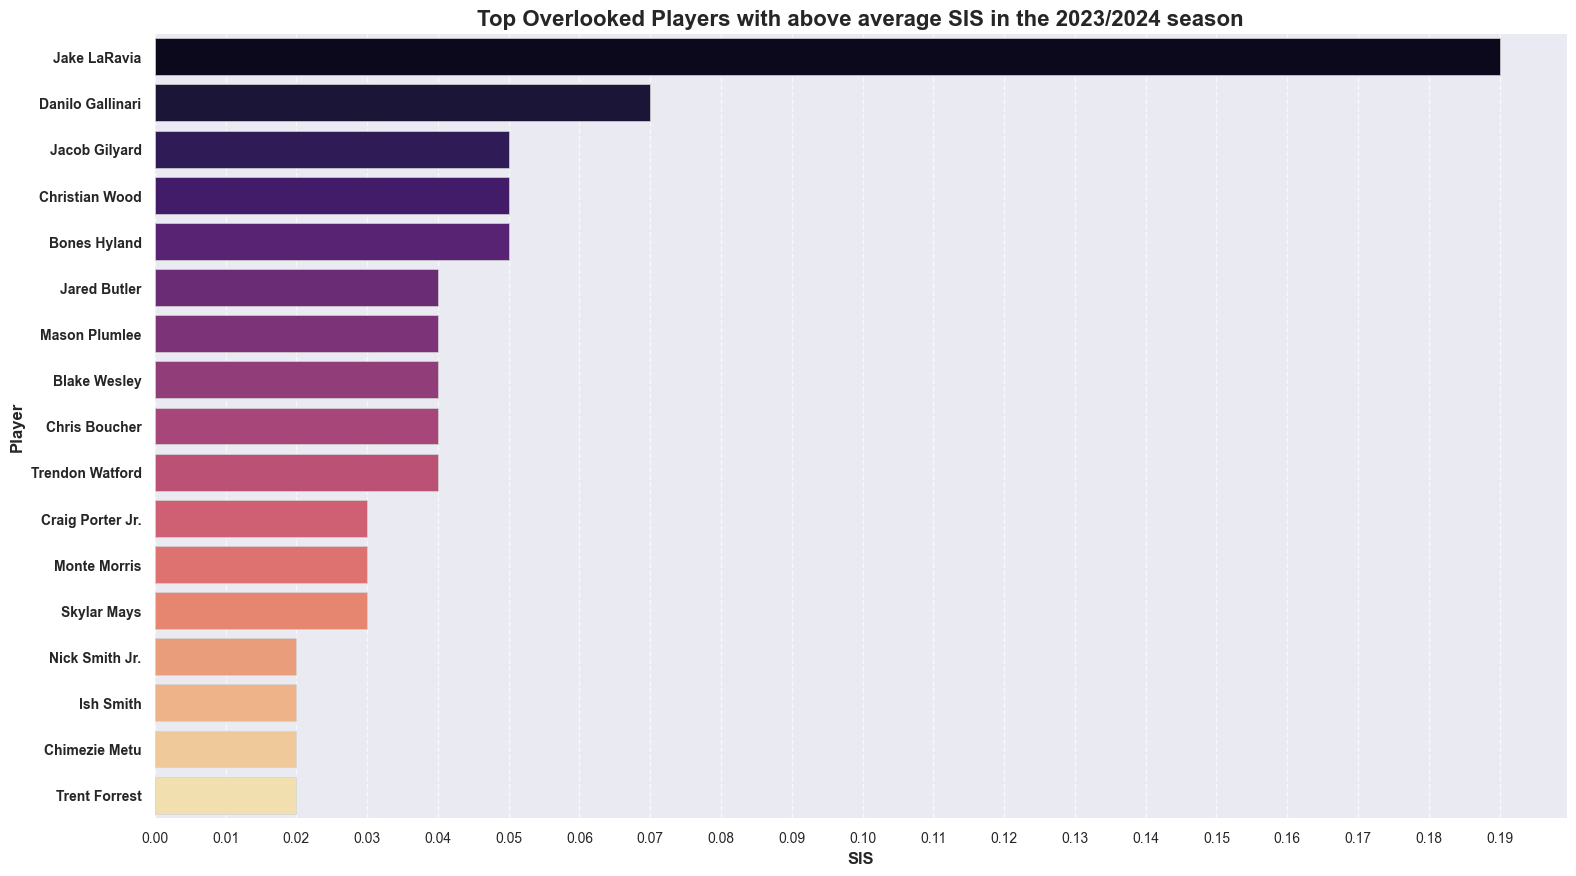

In [200]:
#Overlooked Players
league_avg_mp = cleaned_df['MP'].median()
league_avg_sis = cleaned_df['SIS'].median()
print('League Average minutes played: ', league_avg_mp)
print('League Average SIS: ', league_avg_sis)

overlooked_df = cleaned_df[(cleaned_df['MP'] < league_avg_mp) & (cleaned_df['SIS'] > league_avg_sis) & (cleaned_df['GP'] > 32)].sort_values(by='SIS', ascending=False)
# Set style for better visuals
sns.set_style('darkgrid') #Change theme.

# Plot SIS by Player
plt.figure(figsize=(16,9)) #increase figure size.
print(overlooked_df[['Player', 'SIS','MP']]) # Print the sorted dataframe for debugging purposes.
palette = sns.color_palette("magma", n_colors = len(overlooked_df)) #create color palette.
sns.barplot(x='SIS', y='Player', data=overlooked_df, hue='Player',palette=palette, edgecolor='lightgray', linewidth=0.5, legend=False) #add colors and edges.

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(0.01)) # Set x-axis major ticks to every 50 for better readability.

plt.grid(axis='x', linestyle='--', alpha=0.7) #add grid lines to x-axis for better readability.

plt.title('Top Overlooked Players with above average SIS in the 2023/2024 season', fontsize=16, fontweight='bold') #improve title.
plt.xlabel('SIS', fontsize=12, fontweight='bold') #improve x label.
plt.ylabel('Player', fontsize=12, fontweight='bold') #improve y label.
plt.xticks(fontsize=10) #increase tick size.
plt.yticks(fontsize=10, fontweight='bold') #increase tick size.

sns.despine(left=True, bottom=True) #remove spines.
plt.tight_layout() #improve layout.

plt.show()